In [1]:
import numpy as np
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

## Import Fluxes

## Upscaling of Biomass Growth Time-Series

In [142]:
hdf5_file = h5py.File(h5_files[10], 'r')
# Fetching the first five time steps
time_n = list(hdf5_file.keys())[2:]
time_steps = np.linspace(0,len(time_n),len(time_n)+1)
time_steps

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114.])

In [3]:
import re

# List of strings
time_strings = time_n

# Function to extract the numerical value from the string
def extract_numeric_value(s):
    # Find the pattern in the string
    match = re.search(r'\d+\.\d+E\+\d+', s)
    # Convert to float and return
    return float(match.group()) if match else 0

# Sort the list based on the extracted numeric value
sorted_time_strings = sorted(time_strings, key=extract_numeric_value)

# Display the first few sorted items as a sample
sorted_time_strings[:10]  # Displaying only the first 10 items for brevity

sorted_time_strings[-95:-20]

NameError: name 'time_n' is not defined

## Get Scales

In [23]:
base = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/'
base_in = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/'

files = os.listdir(base)
in_files=[]
pt_files=[]
for i in range(len(files)):
    if '1x' in files[i]:
        in_files.append(base_in+files[i][:-3]+'.in')
        pt_files.append(base+files[i])
in_files


std_xvals = np.array([1.70197891e-01, 6.80791277e-07, 1.66802475e-09, 2.63589458e-01,
       2.43011833e+02, 1.62656786e-05, 1.97976257e-05, 1.26113108e-05,
       1.04760648e-05, 2.03374990e-05, 2.37169225e-20, 2.73895690e-05,
       1.88304840e-05, 3.62977174e-05, 8.62974516e-06, 4.57323091e-01,
       1.00000000e+00, 4.80493183e-01, 4.73852286e-01, 1.00000000e+00])
std_xvals

mean_xvals = np.array([2.68150191e+00, 1.37260149e-05, 2.89522387e-09, 3.65957447e-01,
       2.98299143e+02, 1.48468741e-05, 1.86579623e-05, 1.28485740e-05,
       1.17495124e-05, 3.17647806e-05, 2.00000000e-05, 2.26218668e-05,
       1.72304900e-05, 2.49742462e-05, 9.75718447e-06, 2.97872340e-01,
       0.00000000e+00, 3.61702128e-01, 3.40425532e-01, 0.00000000e+00])
mean_xvals

array([2.68150191e+00, 1.37260149e-05, 2.89522387e-09, 3.65957447e-01,
       2.98299143e+02, 1.48468741e-05, 1.86579623e-05, 1.28485740e-05,
       1.17495124e-05, 3.17647806e-05, 2.00000000e-05, 2.26218668e-05,
       1.72304900e-05, 2.49742462e-05, 9.75718447e-06, 2.97872340e-01,
       0.00000000e+00, 3.61702128e-01, 3.40425532e-01, 0.00000000e+00])

In [11]:
pt_files

['/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_33_24_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_41_20_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_47_9_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_18_19_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_49_19_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_29_9_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_38_16_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_39_10_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_40_8_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_18_10_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_3

In [122]:
x = get_x(in_files[0])
x

482.94476989351745
15.966102071508233


array([2.4595700e+00, 1.2838300e-05, 4.5209500e-09, 1.0000000e-01,
       4.8294477e+02, 3.7064800e-05, 1.0301800e-05, 2.2149600e-05,
       6.3838700e-06, 3.7064800e-05, 2.0000000e-05, 6.5101100e-06,
       2.4402800e-05, 1.7188900e-05, 8.9090300e-06, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00])

In [24]:
def get_x(infile):
    with open(infile, 'r') as file:
        lines = file.readlines()
    count=0
    molass_vals=[]
    crv_vals=[]
    for line in lines:
        if 'EXPONENT_B' in line:
            exp_b = float(line.split()[1])
        if 'RATE_B_1' in line:
            b1 = float(line.split()[1].replace('d','e'))
        if 'RATE_C' in line:
            c = float(line.split()[1].replace('d','e'))
        if 'STOICHIOMETRIC_D_1' in line:
            d1 = float(line.split()[1].replace('d','e'))
        if 'LIQUID_PRESSURE' in line:
            if ('1' in line) | ('2' in line)| ('3' in line)| ('4' in line)| ('5' in line)| ('6' in line):
                press_lr = float(line.split()[1].replace('d','e'))
                #print(press_lr)
    
        if 'LIQUID_PRESSURE LIST' in line:
            press_lines= (lines[count+4:count+140])
            if '24' in press_lines[0]:
                press=[]
                for k in press_lines:
                    press.append(float(k.split()[1]))
                press_ud_m=np.mean(press)
                press_ud_std=np.std(press)
                press_ud_max=np.max(press)
                press_ud_min=np.min(press)
    
                #print (press_ud_std)
    
        if ('molasses' in line)&('d' in line):
            ml=float(line.split()[1].replace('d','e'))
            if (ml == 1e-20)|(ml == 4e-10):
                continue
            else:
                molass_vals.append(ml)
    
        if ('Cr(VI)' in line)&('d' in line):
            ml=float(line.split()[1].replace('d','e'))
            if (ml == 1e-20)|(ml == 1.923e-10):
                continue
            else:
                crv_vals.append(ml)
                    
        count = count+1
    
    if '/gaining' in infile:
        sim = [0, 0, 0, 1,0]
    elif '/high_gaining' in infile:
        sim = [0, 0, 1, 0,0]
    elif '/losing' in infile:
        sim = [0, 1, 0, 0,0]
    elif '/high_losing' in infile:
        sim = [1, 0, 0, 0,0]
    init_vals=[exp_b, b1, c, d1, press_lr]
    molass_vals.append(np.max(molass_vals))
    x = np.concatenate([init_vals,molass_vals,crv_vals,sim])
    x = (x-mean_xvals)/std_xvals
    return x




In [8]:
np.mean(xvals,0).shape

(20,)

In [17]:
xvals=np.zeros([len(in_files),20])
for i in range(len(in_files)):
    xvals[i,:]=get_x(in_files[i])
np.max(xvals,0)

array([2.91498000e+00, 1.46599000e-05, 6.94305000e-09, 8.00000000e-01,
       1.10988793e+03, 6.62191000e-05, 1.00781000e-04, 6.62234000e-05,
       6.00791000e-05, 1.00781000e-04, 2.00000000e-05, 1.21324000e-04,
       9.05003000e-05, 2.23427000e-04, 4.05603000e-05, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00])

In [15]:
mean_xvals = np.array([2.68150191e+00, 1.37260149e-05, 2.89522387e-09, 3.65957447e-01,
       2.98299143e+02, 1.48468741e-05, 1.86579623e-05, 1.28485740e-05,
       1.17495124e-05, 3.17647806e-05, 2.00000000e-05, 2.26218668e-05,
       1.72304900e-05, 2.49742462e-05, 9.75718447e-06, 2.97872340e-01,
       0.00000000e+00, 3.61702128e-01, 3.40425532e-01, 0.00000000e+00])
mean_xvals

array([2.68150191e+00, 1.37260149e-05, 2.89522387e-09, 3.65957447e-01,
       2.98299143e+02, 1.48468741e-05, 1.86579623e-05, 1.28485740e-05,
       1.17495124e-05, 3.17647806e-05, 2.00000000e-05, 2.26218668e-05,
       1.72304900e-05, 2.49742462e-05, 9.75718447e-06, 2.97872340e-01,
       0.00000000e+00, 3.61702128e-01, 3.40425532e-01, 0.00000000e+00])

In [16]:

std_xvals = np.array([1.70197891e-01, 6.80791277e-07, 1.66802475e-09, 2.63589458e-01,
       2.43011833e+02, 1.62656786e-05, 1.97976257e-05, 1.26113108e-05,
       1.04760648e-05, 2.03374990e-05, 2.37169225e-20, 2.73895690e-05,
       1.88304840e-05, 3.62977174e-05, 8.62974516e-06, 4.57323091e-01,
       0.00000000e+00, 4.80493183e-01, 4.73852286e-01, 0.00000000e+00])
std_xvals

array([1.70197891e-01, 6.80791277e-07, 1.66802475e-09, 2.63589458e-01,
       2.43011833e+02, 1.62656786e-05, 1.97976257e-05, 1.26113108e-05,
       1.04760648e-05, 2.03374990e-05, 2.37169225e-20, 2.73895690e-05,
       1.88304840e-05, 3.62977174e-05, 8.62974516e-06, 4.57323091e-01,
       0.00000000e+00, 4.80493183e-01, 4.73852286e-01, 0.00000000e+00])

In [108]:
init_vals=[exp_b, b1, c, d1, press_lr]
#init_vals = (init_vals-np.min(init_vals))/(np.max(init_vals)-np.min(init_vals))
init_vals

[2.45957, 1.28383e-05, 4.52095e-09, 0.1, 482.94476989351745]

In [109]:
molass_vals.append(np.max(molass_vals))
#molass_vals = (molass_vals-np.min(molass_vals))/(np.max(molass_vals)-np.min(molass_vals))

molass_vals

[3.70648e-05, 1.03018e-05, 2.21496e-05, 6.38387e-06, 3.70648e-05]

In [110]:
sim

[0, 0, 0, 1, 0]

In [111]:
#crv_vals = (crv_vals-np.min(crv_vals))/(np.max(crv_vals)-np.min(crv_vals))

crv_vals

[2e-05, 6.51011e-06, 2.44028e-05, 1.71889e-05, 8.90903e-06]

In [118]:
x = np.concatenate([init_vals,molass_vals,crv_vals,sim])
#x.flatten()
x[19]

0.0

In [7]:
num_time_steps
sorted_time_strings[1]

'Time:  4.80000E+01 h'

In [5]:
len(h5_files_train)

47

In [4]:
len(h5_files)

47

In [29]:
min_scales

array([9.97844362e-21])

## Save as .pt for quick loading during training

In [ ]:
#For bio, use min-max 
#For molasses, use min-max with MSLE loss

In [7]:
# Number of time steps and features to extract
#file_path = '/mnt/data/high_losing_42_11_1xscale.h5'
import h5py
import cv2
import torch

#h5_files_train = h5_files_train[0:5]
hdf5_file = h5py.File(h5_files[0], 'r')
# Fetching the first five time steps
time_n = list(hdf5_file.keys())[2:]
time_steps = np.linspace(0,len(time_n),len(time_n)+1)
import re

# List of strings
time_strings = time_n

# Function to extract the numerical value from the string
def extract_numeric_value(s):
    # Find the pattern in the string
    match = re.search(r'\d+\.\d+E\+\d+', s)
    # Convert to float and return
    return float(match.group()) if match else 0

# Sort the list based on the extracted numeric value
sorted_time_strings = sorted(time_strings, key=extract_numeric_value)

# Inspecting the features present in each of these time steps
#features_per_time_step = {time_step: list(hdf5_file[time_step].keys()) for time_step in time_steps}


num_time_steps = len(sorted_time_strings)
num_features = 1  # As observed from the dataset

# Initialize the final array with the desired shape [5, 100, 200, 19]


# Extracting and reshaping data from the first five time steps
perm_covar=[]
max_l=[]
growth_rates=[]
rate_c=[]
rate_d=[]
exp_b = []
tag_scales = []
for i in range(len(h5_files)):
    hdf5_file = h5py.File(h5_files[i], 'r')
    hdf5_file_train = h5py.File(h5_files_train[i], 'r')
    y = np.zeros((num_time_steps, 100, 2000, num_features))
    x = np.zeros((num_time_steps, 100, 400, num_features))
    for t_idx, time_step in enumerate(sorted_time_strings):  # Skipping the first two non-time-step groups
        count=0
        for f_idx, feature in enumerate(features):
            #if ('molass' not in feature)&('O2' not in feature)& ('Perm' not in feature)& ('Material' not in feature)& ('Sat' not in feature)& ('Z' not in feature)& ('biocide' not in feature)& ('ethanol' not in feature)& ('Chubbite' not in feature):
            dataset = hdf5_file[time_step][feature]
            y[t_idx, :, :, count] = dataset[:, :, 0]#cv2.resize(dataset[:, :, 0], [500,50])  # Reshape and assign
            
            dataset = hdf5_file_train[time_step][feature]
            x[ t_idx, :, :, count] = dataset[:, :, 0]
            count = count+1


    #x = np.log(x+1e-30)
    #y = np.log(y+1e-30)
    for j in range(x.shape[3]):
        xmean = mean_scales[j]
        xstd = std_scales[j]
        x[:,:,:,j] = (x[:,:,:,j] - xmean)/(xstd)
        y[:,:,:,j] = (y[:,:,:,j] - xmean)/(xstd)
        #xmin = min_scales[j]
        #xmax = max_scales[j]
        #x[:,:,:,j] = (x[:,:,:,j] - xmin)/(xmax-xmin)
        #x[:,:,:,j] = (x[:,:,:,j]*.99)+.01
        #y[:,:,:,j] = (y[:,:,:,j] - xmin)/(xmax-xmin)
        #y[:,:,:,j] = (y[:,:,:,j]*.99)+.01
        
    #if 'high_gaining' in h5_files[i]:
    #    perm_covar=int(h5_files[i].split('_')[5])/int(h5_files[i].split('_')[6])
    #else:
     #   perm_covar=int(h5_files[i].split('_')[4])/int(h5_files[i].split('_')[5])
  
    
    #if 'high_gaining' in h5_files[i]:
    #    max_l=np.max([int(h5_files[i].split('_')[5]),int(h5_files[i].split('_')[6])])
    #else:
    #    max_l=np.max([int(h5_files[i].split('_')[4]),int(h5_files[i].split('_')[5])])
    #max_l
    
    file_path = h5_files[i][:-3]+'.in'
    print (file_path)
    #with open(file_path, 'r') as file:
    #    lines = file.readlines()
    #gr = float(lines[79].split()[1].replace('d', 'e'))
    #c = float(lines[81].split()[1].replace('d', 'e'))
    #d = float(lines[94].split()[1].replace('d', 'e'))
    #b = float(lines[65].split()[1])

    #c = c*1e10
    #b = b/2.5
    #max_l = max_l/10
    #gr = gr*1e5


    #tags =[c, d, b, max_l, perm_covar, gr]
    #count=0
    
    #tags_small = np.zeros([100,100,400,1])
    #tags_small[:,0:16, :, :] = torch.full((114,16,400,1),tags[0])
    #tags_small[:,16:32, :, :] = torch.full((114,16,400,1),tags[1])
    #tags_small[:,32:48, :, :] = torch.full((114,16,400,1),tags[2])
    #tags_small[:,48:64, :, :] = torch.full((114,16,400,1),tags[3])
    ##tags_small[:,64:80, :, :] = torch.full((114,16,400,1),tags[4])
    #tags_small[:,80:, :, :] = torch.full((114,20,400,1),tags[5])

    #tags_big = np.zeros([100,100,2000,1])
    #tags_big[:,0:16, :, :] = torch.full((114,16,2000,1),tags[0])
    #tags_big[:,16:32, :, :] = torch.full((114,16,2000,1),tags[1])
    #tags_big[:,32:48, :, :] = torch.full((114,16,2000,1),tags[2])
    #tags_big[:,48:64, :, :] = torch.full((114,16,2000,1),tags[3])
    #tags_big[:,64:80, :, :] = torch.full((114,16,2000,1),tags[4])
    #tags_big[:,80:, :, :] = torch.full((114,20,2000,1),tags[5])

    x = torch.tensor(x)
    y = torch.tensor(y)
    #tags_small = torch.tensor(tags_small)
    #x = torch.cat((x,tags_small),dim=3)
    #y = torch.cat((y,torch.tensor(tags_big)),dim=3)
    
    torch.save(x,'/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/'+h5_files_train[i].split('/')[-1][:-3]+'.pt') 
    torch.save(y,'/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/'+h5_files[i].split('/')[-1][:-3]+'.pt') 
    del y,hdf5_file,hdf5_file_train

# Checking the shape of the extracted data array
#y.shape




# Open the HDF5 file and extract data to fit the specified shape [5, 100, 200, n]
#extracted_data_array[0]

/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_gaining_14_10_10xscale.in
/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/gaining_17_22_10xscale.in
/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_18_10_10xscale.in
/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_gaining_18_19_10xscale.in
/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/gaining_22_16_10xscale.in
/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_22_21_10xscale.in
/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_gaining_24_17_10xscale.in
/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/gaining_25_15_10xscale.in
/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_26_16_10xscale.in
/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_gaining_27_14_10xscale.in
/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input

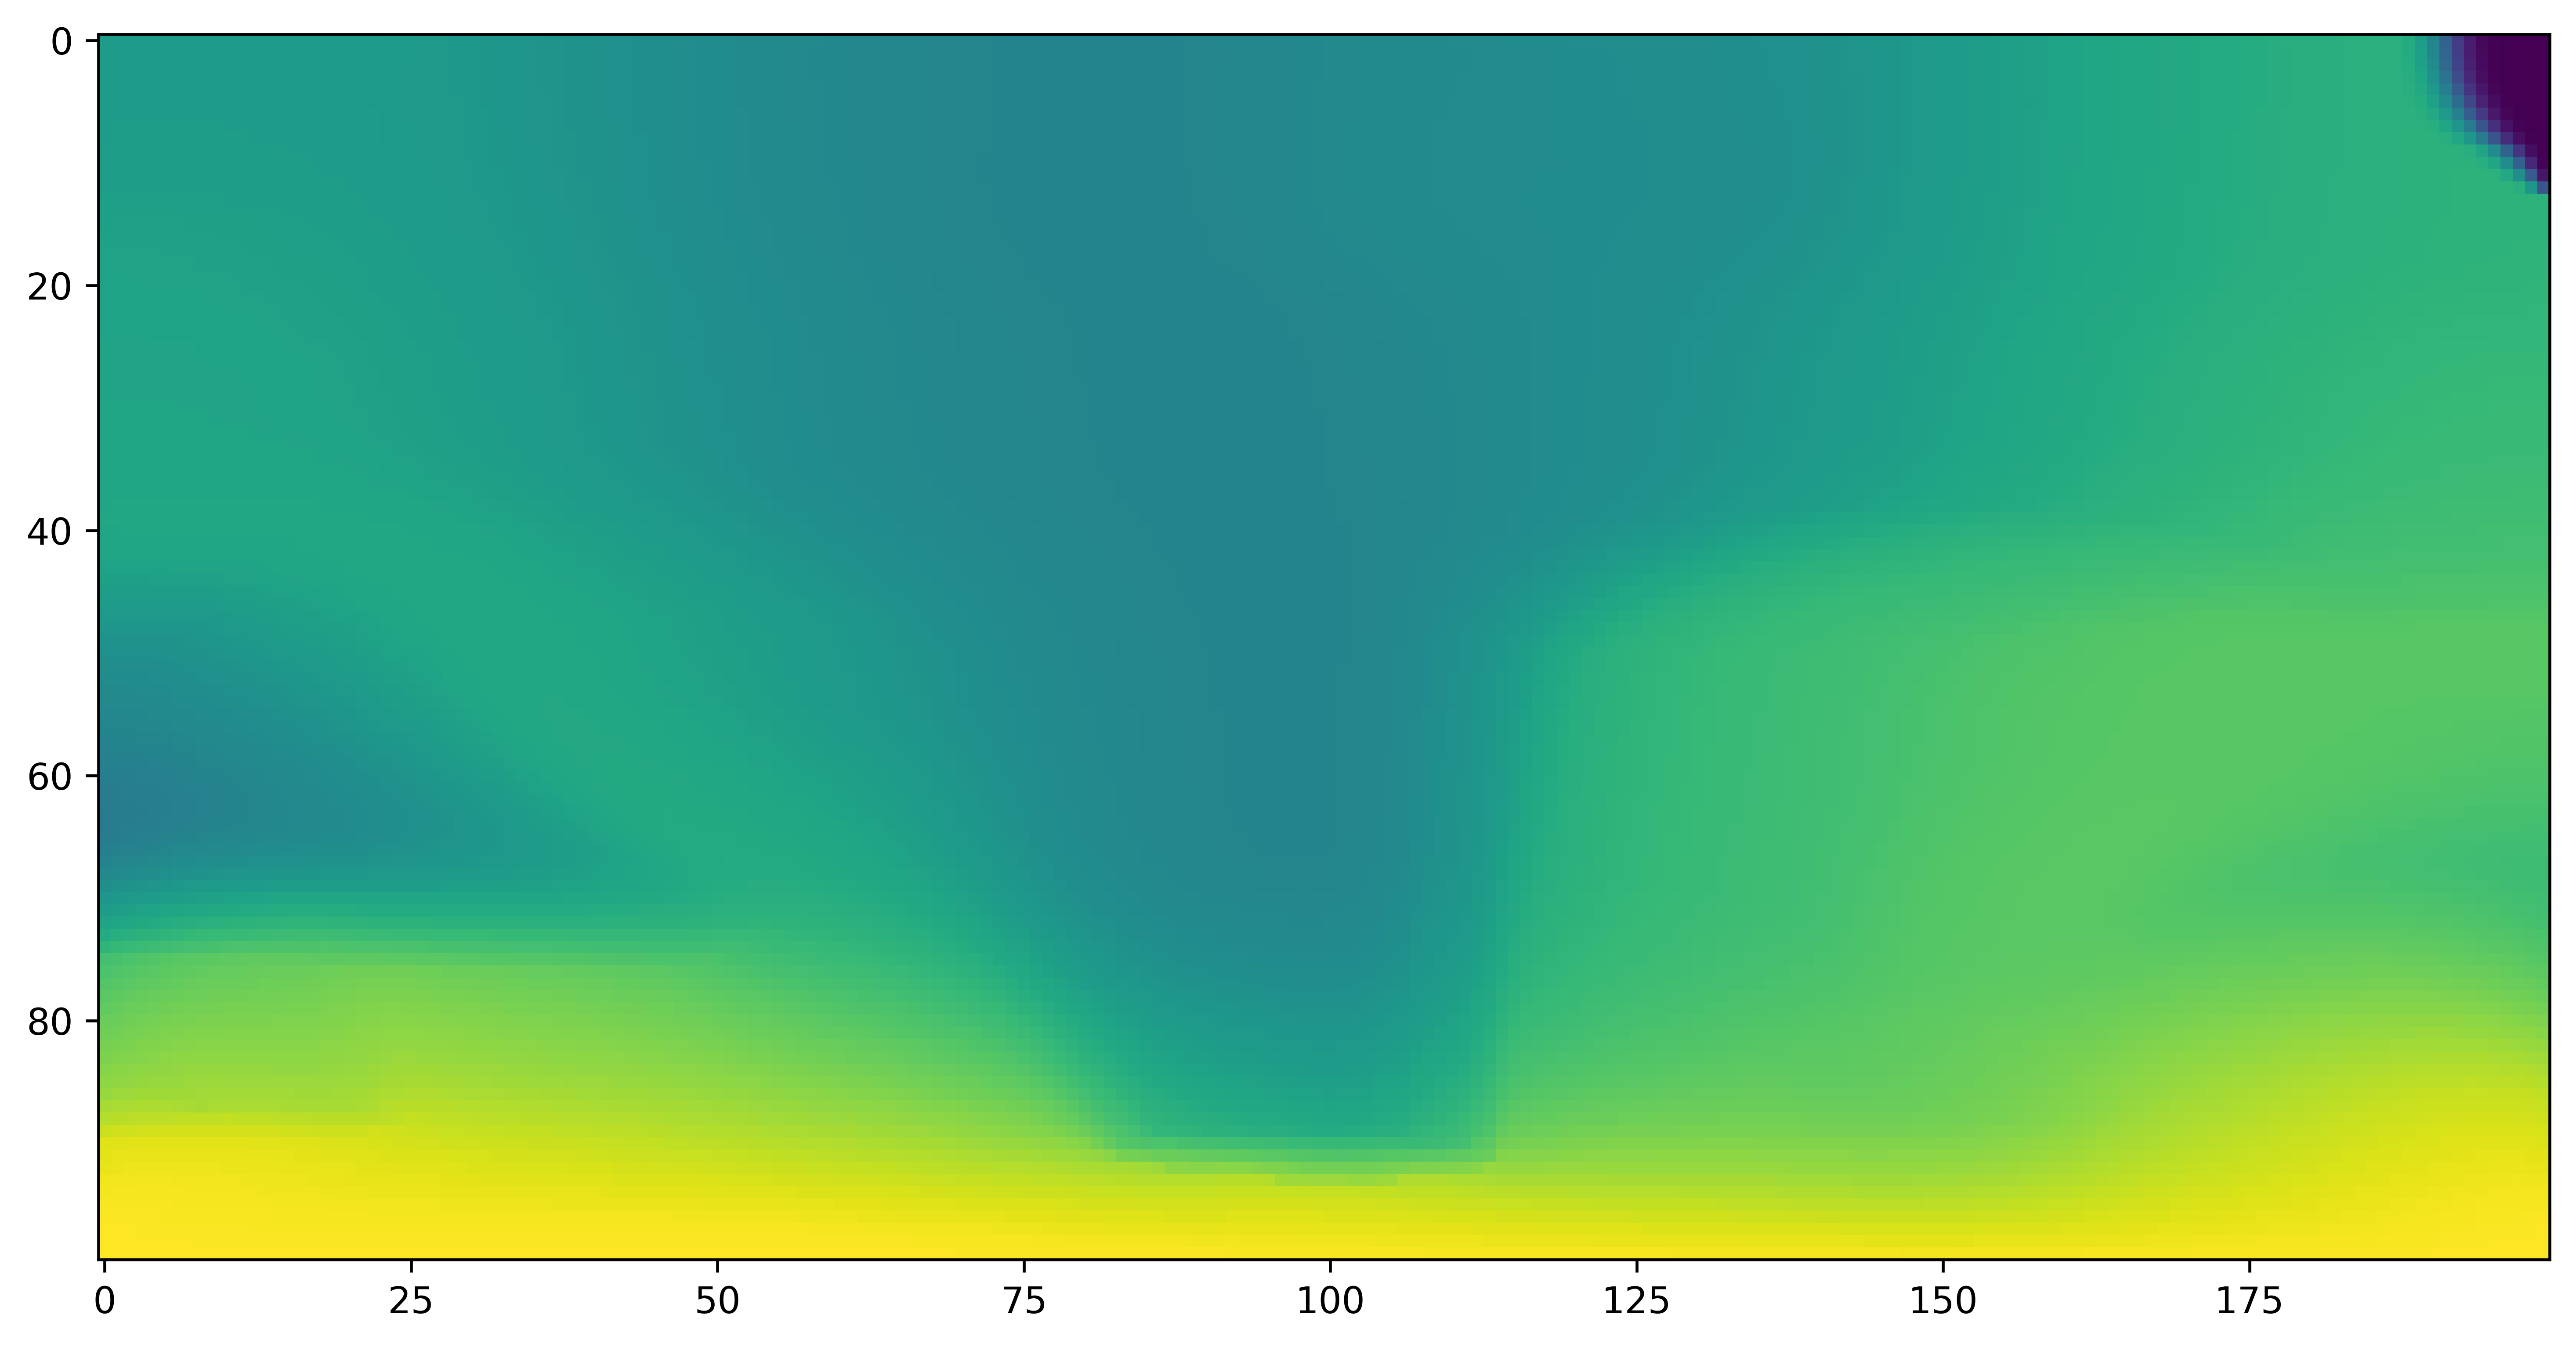

In [30]:
n=0
out = x[30,:,:,n]#.cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(12,12), dpi=600)
plt.imshow(out)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()



In [119]:
in_files

['/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/gaining_33_24_1xscale.in',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_gaining_41_20_1xscale.in',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_gaining_47_9_1xscale.in',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_gaining_18_19_1xscale.in',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_49_19_1xscale.in',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_gaining_29_9_1xscale.in',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/gaining_38_16_1xscale.in',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_39_10_1xscale.in',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_gaining_40_8_1xscale.in',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_18_10_1xscale.in',
 '/home/mbadhan/Desktop/mb

In [120]:
pt_files

['/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_33_24_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_41_20_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_47_9_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_18_19_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_49_19_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_29_9_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_38_16_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_39_10_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_40_8_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_18_10_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_3

In [4]:
h5_files_train

array([], dtype=float64)

In [25]:
import h5py
import cv2
import os 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader


num_time_steps = 80
num_features = 6  # As observed from the dataset

class CustomDataset(Dataset):
    def __init__(self, x_fname, target_fname):
        self.x_fname = x_fname
        self.target_fname = target_fname

    def __len__(self):
        return len(self.x_fname)

    def __getitem__(self, idx):
        file1 = self.x_fname[idx]
        file2 = self.target_fname[idx]
        low_scale = torch.load(file1)
        high_scale = torch.load(file2)
        
        return low_scale, high_scale


class VelDataset(Dataset):
    def __init__(self, x_fname, target_fname):
        self.x_fname = x_fname
        self.target_fname = target_fname

    def __len__(self):
        return len(self.x_fname)

    def __getitem__(self, idx):
        file1 = self.x_fname[idx]
        file2 = self.target_fname[idx]
        low_scale = get_x(file1)
        low_scale = torch.tensor(low_scale).float()
        high_scale = torch.load(file2)[:,:,:,0].float()
        
        return low_scale, high_scale

In [63]:


#xtrain = ([h5_files_train[i] for i in range(len(h5_files_train)) if i%5])
#ytrain = ([h5_files[i] for i in range(len(h5_files)) if  i%5])


dataset = VelDataset(in_files[:-4],pt_files[:-4])
dataloader = DataLoader(dataset, batch_size=4, shuffle=True,  num_workers=4, drop_last=True)
x,y = next(iter(dataloader))
x.shape


torch.Size([4, 20])

In [8]:
y.shape

torch.Size([10, 114, 100, 200])

In [7]:
h5_files_train

['/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_27_8_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_18_19_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_34_15_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_25_15_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_31_7_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_33_24_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_27_14_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_40_17_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_35_7_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_41_17_1xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_42_11_1xscal

In [8]:
h5_files

['/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_27_8_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_18_19_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_34_15_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_25_15_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_31_7_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_33_24_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_27_14_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_40_17_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_gaining_35_7_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/high_losing_41_17_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_42

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 20))
x,y = next(iter(dataloader))
count=0
for x, y in dataloader:
    print (count)
    count=count+1
    for i in range(8):
        plt.figure()  # Create a new figure for each iteration
        plt.imshow(y[i, 89, :, :])
        plt.show()
        print(x)
        plt.show() # Display the current figure

UnboundLocalError: Caught UnboundLocalError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/mbadhan/anaconda3/envs/timm_new/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/mbadhan/anaconda3/envs/timm_new/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/mbadhan/anaconda3/envs/timm_new/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/tmp/ipykernel_353266/2896090252.py", line 62, in __getitem__
    low_scale = get_x(file1)
  File "/tmp/ipykernel_353266/690239558.py", line 58, in get_x
    init_vals=[exp_b, b1, c, d1, press_lr]
UnboundLocalError: local variable 'press_lr' referenced before assignment


<Figure size 1000x2000 with 0 Axes>

tensor([2.8392e+00, 1.4357e-05, 9.9552e-10, 1.0000e-01, 1.2059e+02, 9.4543e-06,
        5.0015e-06, 1.4537e-05, 2.6903e-06, 1.4537e-05, 2.0000e-05, 5.0518e-06,
        7.6242e-06, 1.7668e-05, 3.0459e-06, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00], dtype=torch.float64)


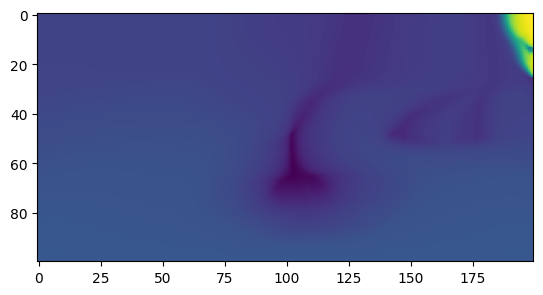

tensor([2.8790e+00, 1.4516e-05, 2.2336e-09, 1.0000e-01, 5.2582e+02, 1.2105e-06,
        4.7213e-05, 1.2185e-06, 1.3163e-05, 4.7213e-05, 2.0000e-05, 1.8807e-05,
        4.9531e-05, 4.4792e-06, 5.5195e-06, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00], dtype=torch.float64)


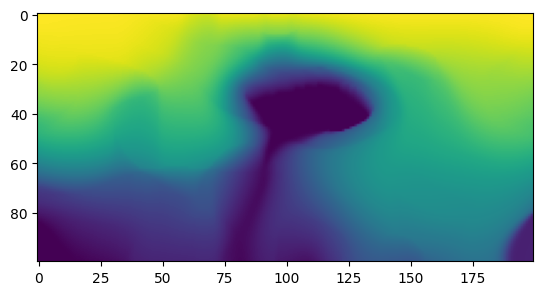

tensor([2.8406e+00, 1.4362e-05, 4.5152e-09, 2.0000e-01, 6.8039e+01, 9.3018e-06,
        5.6286e-05, 2.3809e-05, 1.1928e-05, 5.6286e-05, 2.0000e-05, 3.1292e-05,
        1.0769e-05, 1.7111e-05, 7.8466e-06, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00], dtype=torch.float64)


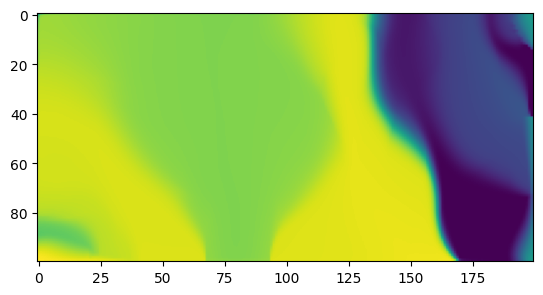

tensor([2.4039e+00, 1.2615e-05, 1.4434e-09, 4.0000e-01, 5.6321e+01, 2.7497e-05,
        5.5703e-06, 1.7282e-06, 9.0236e-07, 2.7497e-05, 2.0000e-05, 5.9136e-06,
        6.6372e-06, 2.0289e-05, 8.5247e-06, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00], dtype=torch.float64)


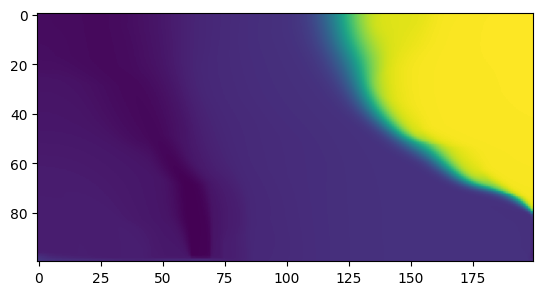

tensor([2.8008e+00, 1.4203e-05, 3.7883e-09, 2.0000e-01, 2.3206e+02, 1.9178e-06,
        3.2523e-06, 1.4935e-05, 2.3617e-06, 1.4935e-05, 2.0000e-05, 2.5360e-05,
        9.0500e-05, 6.1827e-05, 2.2546e-05, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00], dtype=torch.float64)


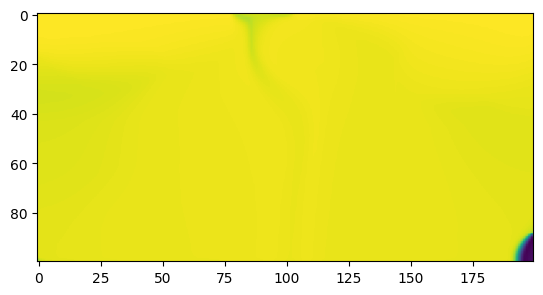

tensor([2.9150e+00, 1.4660e-05, 4.0878e-10, 1.0000e-01, 6.5223e+01, 9.1013e-06,
        1.0078e-04, 2.6298e-05, 2.0950e-05, 1.0078e-04, 2.0000e-05, 1.4005e-06,
        5.5306e-06, 4.3673e-06, 1.1000e-05, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00], dtype=torch.float64)


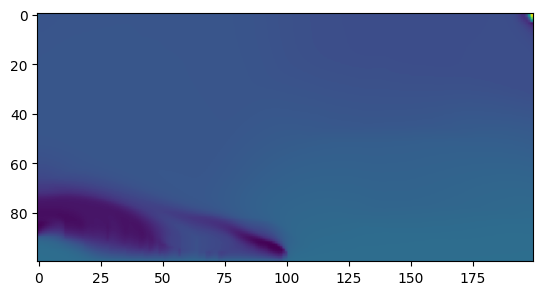

tensor([2.8701e+00, 1.4480e-05, 3.7280e-09, 8.0000e-01, 1.8785e+02, 1.5527e-06,
        9.3782e-06, 5.6738e-06, 1.6962e-06, 9.3782e-06, 2.0000e-05, 5.9796e-06,
        4.6406e-06, 1.4765e-05, 1.3982e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00], dtype=torch.float64)


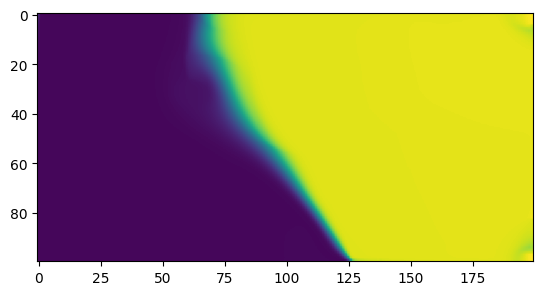

tensor([2.9034e+00, 1.4614e-05, 1.0164e-09, 8.0000e-01, 8.9491e+02, 1.9395e-05,
        9.0520e-06, 1.0933e-05, 5.7808e-06, 1.9395e-05, 2.0000e-05, 2.8759e-05,
        1.4192e-05, 1.9393e-05, 2.7882e-06, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00], dtype=torch.float64)


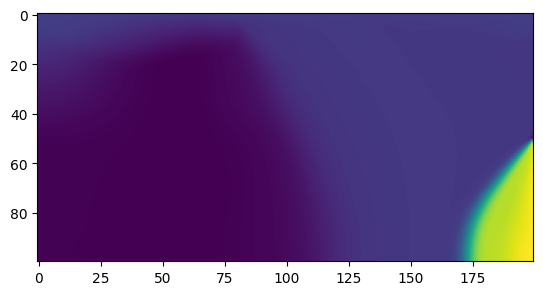

In [130]:
for i in range(8):
    print(x[i])
    plt.figure()  # Create a new figure for each iteration
    plt.imshow(y[i, 89, :, :])
    plt.show()  # Display the current figure

In [32]:
len(h5_files)

77

In [131]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader



In [31]:
114*100*20*3

684000

In [57]:
228000*2

456000

In [27]:



class UNet13(nn.Module):
    def __init__(self, inc, outc):
        super(UNet13, self).__init__()
        
        
        self.fc1 = nn.Linear(20,456000)
        #self.d1 = nn.Dropout(.6, inplace=True)
        self.fc2 = nn.Linear(40,200)
        self.fc3 = nn.Linear(200,2000)
        self.fc4 = nn.Linear(2000,200)


    def forward(self, x):
        #x = x.repeat_interleave(5, dim=3)
        x = F.gelu(self.fc1(x))
        #x = self.d1(x)
        #x = self.bn1(x)
        #x = F.gelu(self.fc2(x))
        x = torch.reshape(x,(4,114,100,40))
        x = F.gelu(self.fc2(x))
        x = F.gelu(self.fc3(x))
        x = (self.fc4(x))


        return x
        
class UNet10(nn.Module):
    def __init__(self, inc, outc):
        super(UNet10, self).__init__()
        
        
        self.fc1 = nn.Linear(2000,2000)
        #self.d1 = nn.Dropout(.6, inplace=True)
        #self.bn1 = nn.InstanceNorm2d(114)
        self.fc2 = nn.Linear(2000,2000)
        #self.bn2 = nn.BatchNorm2d(114)
        #self.d2 = nn.Dropout(.6, inplace=True)
        self.fc3 = nn.Linear(2000,2000)
        #self.bn3 = nn.BatchNorm2d(114)
        #self.d3 = nn.Dropout(.2)
        #self.fc4 = nn.Linear(2000,2000)
        #self.fc5 = nn.Linear(2000,2000)
        #self.fc6 = nn.Linear(2000,2000)
        self.fc7 = nn.Linear(2000,2000)
        self.fc8 = nn.Linear(2000,2000)


    def forward(self, x):
        x = x.repeat_interleave(10, dim=3)
        x = (self.fc1(x))
        #x = self.d1(x)
        #x = self.bn1(x)
        x = (self.fc2(x))
        #x = self.bn2(x)
        #x = self.d2(x)
        x = (self.fc3(x))
        #x = self.bn3(x)
        #x = self.d3(x)
        #x = F.gelu(self.fc4(x))
        #x = F.gelu(self.fc5(x))
        #x = F.selu(self.fc6(x))
        x = (self.fc7(x))
        x = self.fc8(x)


        return x


class UNet11(nn.Module):
    def __init__(self, inc, outc):
        super(UNet11, self).__init__()
        
        
        #self.fc1 = nn.Linear(400,4000)
        #self.d1 = nn.Dropout(.6)
        #self.fc2 = nn.Linear(2000,4000)
        
        self.fc3 = nn.Linear(100,200)
        self.d2 = nn.Dropout(.2, inplace=True)
        #self.d3 = nn.Dropout(.2)
        self.fc4 = nn.Linear(90,180)
        self.d3 = nn.Dropout(.2)
        self.conv1 = nn.Conv2d(2000, 2000, (5, 5), stride=(2, 2), padding=(2, 2))

        self.fc5 = nn.Linear(2000,3000)
        self.fc6 = nn.Linear(3000,2000)
        #self.fc7 = nn.Linear(2000,2000)
        #self.fc8 = nn.Linear(2000,2000)


    def forward(self, x):
        #x = F.selu(self.fc1(x))
        #x = self.d1(x)
        #x = self.bn1(x)
        #x = F.selu(self.fc2(x))
        
        #x = x.permute(0,1,3,2)
        #x = F.selu(self.fc3(x))
        #x = self.d2(x)
        
        x = x.permute(0,3,2,1)
        #x = F.selu(self.fc4(x))
        #x = self.d3(x)
        
        x = F.selu(self.conv1(x))
        x = x.permute(0,3,2,1)
        x = F.selu(self.fc5(x))
        x = (self.fc6(x))
        #x = (self.fc7(x))
        #x = self.fc8(x)

        return x


class UNet12(nn.Module):
    def __init__(self, inc, outc):
        super(UNet12, self).__init__()
        
        self.fc1 = nn.Linear(2000,2000)
        self.d1 = nn.Dropout(.5)
        self.fc2 = nn.Linear(200,2000)
        self.d2 = nn.Dropout(.5)
        self.conv1 = nn.Conv2d(200,2000, kernel_size = 1)
        self.d3 = nn.Dropout(.5)
        #)
        #self.fc2 = nn.Linear(2000,2000)
       # self.d2 = nn.Dropout(.2)
        #self.fc3 = nn.Linear(2,1)
        #self.d3 = nn.Dropout(.05)
        self.fc4 = nn.Linear(2000,2000)
        #self.d4 = nn.Dropout(.3)
        self.fc5 = nn.Linear(2000,2000)
        #self.fc6 = nn.Linear(2000,2000)
        self.fc7 = nn.Linear(2000,2000)
        #self.fc8 = nn.Linear(2000,2000)


    def forward(self, x):
        x0 = x.repeat_interleave(10, dim=3)
        x0 = F.gelu(self.fc1(x0))
        x0 = self.d1(x0)
        x2 = F.gelu(self.fc2(x))
        x2 = self.d2(x2)
        x1 = F.gelu(self.conv1(x.permute(0,3,2,1))).permute(0,3,2,1)
        x1 = self.d3(x1)
        #print (x2.shape, x1.shape, x0.shape)
        x = F.scaled_dot_product_attention(x1, x2, x0)*x0
        #x0 = x0.unsqueeze(dim=4)
        #x = x.unsqueeze(dim=4)
        #x = torch.cat((x0,x),dim=4)
        #x = F.gelu(self.fc3(x))
        #x = x.squeeze(dim=4)
        x = F.silu(self.fc4(x))
        
        
       # 
        #x = self.bn1(x)
        #x = (self.fc2(x))
       # x = self.d2(x)
        #x = (self.fc3(x))
        #x = self.d4(x)
        #x = (self.fc4(x))
        x = F.gelu(self.fc5(x))
        #x = F.gelu(self.fc6(x))
        x = (self.fc7(x))


        return x

In [10]:
xtest

NameError: name 'xtest' is not defined

In [103]:
ytrain

['/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_22_16_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_25_15_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_27_7_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_30_15_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_34_6_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_36_11_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_38_16_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_40_17_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_42_11_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_46_17_10xscale.pt',
 '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/gaining_49_10_10xscale.pt',
 '/home/mbad

In [65]:
#xtest = ([h5_files_train[i] for i in range(len(h5_files_train)) if not i%5])
#ytest = ([h5_files[i] for i in range(len(h5_files)) if  not i%5])

test_dataset = VelDataset(in_files[-4:],pt_files[-4:])
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False, drop_last=False, num_workers=0)
#model1.to(device)
#model1


In [64]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = UNet13(200, 2000).to(device)
#model1 = model1.to(torch.float16)

#model2 = UNet2(400, 800).to(device)

#model3 = UNet2(800, 1200).to(device)


#model4 = UNet2(1200, 1600).to(device)

#model5 = UNet2(1600, 2000).to(device)
model1

UNet13(
  (fc1): Linear(in_features=20, out_features=456000, bias=True)
  (fc2): Linear(in_features=40, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=2000, bias=True)
  (fc4): Linear(in_features=2000, out_features=200, bias=True)
)

In [128]:
from torchmetrics import MeanSquaredLogError
MSLE = MeanSquaredLogError().to(device)
MSLE(outputs,labels)

tensor(0.0023, device='cuda:0', grad_fn=<SqueezeBackward0>)

array([ 0.10598613, -2.5306015 , -2.5126143 , -2.5216699 , -2.5845475 ,
       -2.6469173 , -2.582647  , -2.5341158 , -2.5038257 , -2.5110304 ,
       -2.530349  , -2.5745518 , -2.621638  , -2.5997891 , -2.603922  ,
       -2.5584881 , -2.4653914 , -2.4317133 , -2.4321246 , -2.4703925 ,
       -2.5365336 , -2.547555  , -2.554412  , -2.5542529 , -2.641001  ,
       -2.7465053 , -2.637411  , -2.6427324 , -2.6040897 , -2.597528  ,
       -2.5976977 , -2.6557662 , -2.7400613 , -2.8371694 , -2.81876   ,
       -2.9931016 , -3.0226097 , -2.8737981 , -2.7640827 , -2.770839  ,
       -2.7637827 , -2.7343826 , -2.8318636 , -2.8935046 , -2.834194  ,
       -2.8138437 , -2.802048  , -2.9300284 , -2.861051  , -2.8267844 ,
       -2.7821813 , -2.8000998 , -2.871986  , -2.944169  , -3.076169  ,
       -2.979424  , -2.8984568 , -2.9089196 , -3.0145776 , -2.9966977 ,
       -2.994381  , -2.9300253 , -2.9212043 , -3.0247374 , -3.0480237 ,
       -2.9748137 , -2.9275575 , -2.9626765 , -2.9553993 , -3.01

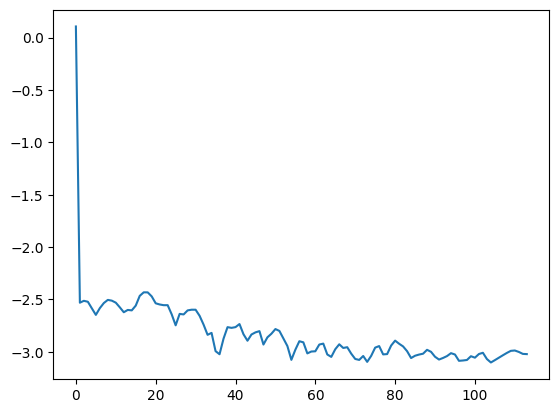

In [96]:
plt.plot(torch.mean(labels, dim=(2,3)).cpu().detach().numpy()[0])
torch.mean(labels, dim=(2,3)).cpu().detach().numpy()[0]

In [25]:
torch.max(outputs)

tensor(0.3054, device='cuda:0')

In [25]:
inputs = batch[0].to(device)
inputs = inputs.repeat_interleave(10, dim=3)
inputs = inputs.repeat_interleave(2, dim=2)
inputs = inputs.repeat_interleave(2, dim=1)
inputs.shape

torch.Size([4, 180, 200, 4000])

In [66]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ExponentialLR
from torchmetrics import MeanSquaredLogError
#class CustomDataset(Dataset):
#    def __init__(self, x, target):
#        """
#        Args:
#            data (numpy array): A numpy array of shape [N, 100, 200, 19] where N is the number of samples.
#        """
#        self.x = torch.tensor(x, dtype=torch.float32)
#        self.target = torch.tensor(target, dtype=torch.float32)#
#
#    def __len__(self):
#        return len(self.x)
#
#    def __getitem__(self, idx):
#        input = self.x[idx]
#        target = self.target[idx]
#        return input, target

#criterion3 = SmoothnessLoss(.1, .1)
#dataset = CustomDataset(x, y)
#dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#criterion1 = DivLoss()
criterion2 = nn.MSELoss()
criterion3 = nn.HuberLoss()
criterion4 = nn.KLDivLoss()

optimizer1 = optim.Adam(model1.parameters(), lr=0.0002)

gamma = .9999# The exponential decay factor (adjust as needed)
scheduler1 = ExponentialLR(optimizer1, gamma=gamma)

#import gc
n=1
# Training loop
num_epochs = 6000
for epoch in range(num_epochs):
    model1.train()
    count=0
    running_loss=0
    for batch in dataloader:
        inputs = batch[0].to(device)
        #inputs = inputs.repeat_interleave(10, dim=3)
        labels = batch[1].to(device)
        #labels = torch.mean(labels, dim=(2,3)).squeeze()
        optimizer1.zero_grad()
        outputs = model1(inputs)
        loss = criterion2(outputs, labels)#[:,:,:,:, n])

        loss.backward()
        optimizer1.step()
        scheduler1.step()
        count=count+1
        running_loss = running_loss+loss.item()
    # Model testing
    model1.eval()
    nn_loss=[]
    for batch in test_dataloader:
        inp = batch[0].to(device)
        #inputs = inputs.repeat_interleave(10, dim=3)
        lab = batch[1].to(device)
        outp = model1(inp)
        nnloss = criterion2(outp, lab)
        nn_loss.append(nnloss.cpu().detach().numpy())
    print(np.mean(nn_loss))
    current_lr = optimizer1.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count}, Learning Rate: {current_lr:.8f}")

17.177555
Epoch 1/6000, Loss: 25.564308166503906, Learning Rate: 0.00019980
17.184168
Epoch 2/6000, Loss: 25.56066017150879, Learning Rate: 0.00019960
17.266903
Epoch 3/6000, Loss: 12.052497959136963, Learning Rate: 0.00019940
17.29507
Epoch 4/6000, Loss: 25.33975760936737, Learning Rate: 0.00019920
17.242887
Epoch 5/6000, Loss: 25.176714777946472, Learning Rate: 0.00019900
17.095285
Epoch 6/6000, Loss: 25.151960444450378, Learning Rate: 0.00019880
16.99663
Epoch 7/6000, Loss: 21.650167727470397, Learning Rate: 0.00019860
16.973404
Epoch 8/6000, Loss: 20.164973044395445, Learning Rate: 0.00019841
16.871014
Epoch 9/6000, Loss: 24.125594520568846, Learning Rate: 0.00019821
16.554243
Epoch 10/6000, Loss: 23.510651612281798, Learning Rate: 0.00019801
16.805706
Epoch 11/6000, Loss: 18.489947772026063, Learning Rate: 0.00019781
16.550663
Epoch 12/6000, Loss: 21.34826488494873, Learning Rate: 0.00019761
16.07178
Epoch 13/6000, Loss: 20.223681497573853, Learning Rate: 0.00019742
15.885074
Epoc

KeyboardInterrupt: 

TypeError: mean(): argument 'input' (position 1) must be Tensor, not list

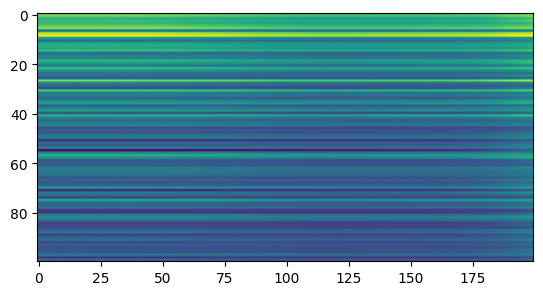

In [68]:
outputs.shape
import matplotlib.pyplot as plt
plt.imshow(outp[0,60,:,:].cpu().detach().numpy())

In [15]:
dataloader = DataLoader(dataset, batch_size=8, shuffle=True,  num_workers=4, drop_last=False)
optimizer1 = optim.Adam(model1.parameters(), lr=0.0002)
gamma = .9999# The exponential decay factor (adjust as needed)
scheduler1 = ExponentialLR(optimizer1, gamma=gamma)
criterion3 = nn.L1Loss()
num_epochs = 100
for epoch in range(num_epochs):
    model1.train()
    count=0
    running_loss=0
    for batch in dataloader:
        inputs = batch[0].to(device)
        #inputs = inputs.repeat_interleave(10, dim=3)
        labels = batch[1].to(device)
        optimizer1.zero_grad()
        outputs = model1(inputs)
        loss = criterion2(outputs, labels)#[:,:,:,:, n])
        #loss2 = criterion3(outputs, labels)
        #max_loss = torch.abs(torch.max(outputs)-torch.max(labels))
        #loss = (loss1+loss2/8)/2
        loss.backward()
        optimizer1.step()
        scheduler1.step()
        count=count+1
        running_loss = running_loss+loss.item()
    model1.eval()
    nn_errors=[]
    orig_errors=[]
    with torch.no_grad():
        for inp, lab in test_dataloader:
            inp = inp.to(device)
            lab= lab.to(device)
            
            outp = model1(inp)
            inp = inp.repeat_interleave(10, dim=3)
            nn_error = criterion2(outp, lab)
            orig_error = criterion2(lab, inp)
            nn_errors.append(nn_error.cpu().detach().numpy())
            orig_errors.append(orig_error.cpu().detach().numpy())
    print (np.mean(orig_errors), np.mean(nn_errors))
    current_lr = optimizer1.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count}, Learning Rate: {current_lr:.8f}")

0.53690904 24.643707
Epoch 1/100, Loss: 7.51547257900238, Learning Rate: 0.00019990
0.53690904 114.48331
Epoch 2/100, Loss: 6.593371641635895, Learning Rate: 0.00019980
0.53690904 7.5248537
Epoch 3/100, Loss: 12.243613886833192, Learning Rate: 0.00019970
0.53690904 11.445052
Epoch 4/100, Loss: 3.566895627975464, Learning Rate: 0.00019960
0.53690904 1.5550746
Epoch 5/100, Loss: 3.1799699038267137, Learning Rate: 0.00019950
0.53690904 1.4047409
Epoch 6/100, Loss: 2.4055601328611376, Learning Rate: 0.00019940
0.53690904 3.8554616
Epoch 7/100, Loss: 2.6563375532627105, Learning Rate: 0.00019930
0.53690904 3.1588814
Epoch 8/100, Loss: 1.716558712720871, Learning Rate: 0.00019920
0.53690904 3.7061465
Epoch 9/100, Loss: 2.2098384737968444, Learning Rate: 0.00019910
0.53690904 2.1444054
Epoch 10/100, Loss: 2.3469573259353638, Learning Rate: 0.00019900
0.53690904 1.4676405
Epoch 11/100, Loss: 1.5381283402442931, Learning Rate: 0.00019890
0.53690904 0.8571886
Epoch 12/100, Loss: 1.59123072624206

KeyboardInterrupt: 

In [47]:
x,y  = next(iter(dataloader))

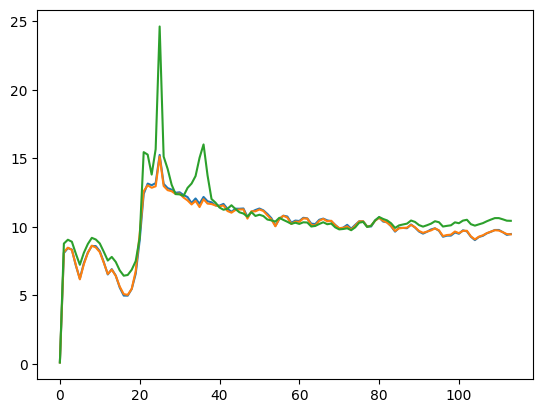

In [56]:
k=5
plt.plot(outputs.cpu().detach().numpy()[k])
plt.plot(labels.cpu().detach().numpy()[k])
plt.plot(inputs.cpu().detach().numpy()[k])

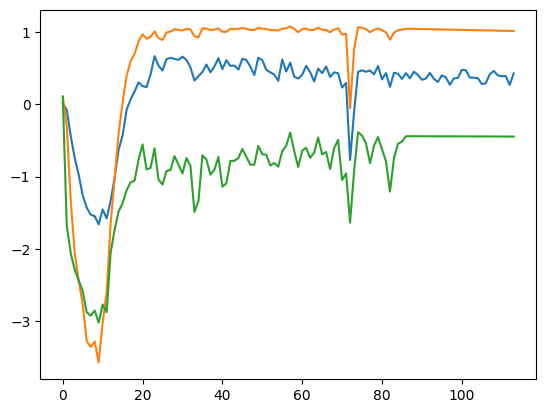

In [61]:
k=3
plt.plot(outp.cpu().detach().numpy()[k])
plt.plot(lab.cpu().detach().numpy()[k])
plt.plot(inp.cpu().detach().numpy()[k])

In [160]:
inputs.shape

torch.Size([8, 90, 100, 200])

In [62]:
torch.save(model1.state_dict(), 'weights_crv_small')

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.data import DataLoader
import wandb

# Assuming 'dataloader' is already defined and loaded
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CustomModel(nn.Module):
    def __init__(self, layer_sizes, activation, dropout_rate):
        super(CustomModel, self).__init__()
        layers = []

        # First layer
        layers.append(nn.Linear(400, layer_sizes[0]))
        layers.append(self._get_activation(activation))
        layers.append(nn.Dropout(dropout_rate))

        # Middle layers
        for i in range(1, len(layer_sizes)):
            layers.append(nn.Linear(layer_sizes[i - 1], layer_sizes[i]))
            layers.append(self._get_activation(activation))
            if i < 2:
                layers.append(nn.Dropout(dropout_rate))

        # Last layer
        layers.append(nn.Linear(layer_sizes[-1], 2000))

        self.model = nn.Sequential(*layers)

    def _get_activation(self, activation):
        if activation == 'relu':
            return nn.ReLU()
        elif activation == 'rrelu':
            return nn.RReLU()
        elif activation == 'tanh':
            return nn.Tanh()

    def forward(self, x):
        return self.model(x)

def objective(trial):
    # Tunable parameters
    num_layers = trial.suggest_int("num_layers", 5, 10)
    layer_sizes = [trial.suggest_int(f"layer_size_{i}", 400, 2000) for i in range(num_layers - 2)]
    activation = trial.suggest_categorical("activation", ["relu", "rrelu", "tanh"])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.6)
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "AdamW"])
    lr = trial.suggest_float("lr", 6e-5, 6e-3)
    NUM_EPOCHS = 40
    wandb.init(project="optuna_pytorch_tuning", name=f"trial_{trial.number}")
    criterion = nn.MSELoss()


    model = CustomModel([400] + layer_sizes + [2000], activation, dropout_rate).to(device)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    wandb.config.update({
        "num_layers": num_layers,
        "layer_sizes": layer_sizes,
        "activation": activation,
        "dropout_rate": dropout_rate,
        "optimizer": optimizer_name,
        "learning_rate": lr
    })

    for epoch in range(NUM_EPOCHS):  # Define NUM_EPOCHS as needed
        model.train()
        count=0
        running_loss=0
        for batch in dataloader:
            # Training loop (forward pass, loss calculation, backpropagation)           
        
            inputs = batch[0].to(device)
            inputs = inputs.float()
            labels = batch[1].to(device)
            labels = labels.float()
    
            optimizer.zero_grad()
            
            outputs = model(inputs)
           
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
        
            #scheduler.step()
           
            count=count+1
            #running_loss = running_loss+loss.item()
        #print ("Train Loss: ", running_loss/(count*6))
        model.eval()
    # Iterate through the test data
        nn_errors=[]
        orig_errors=[]
        with torch.no_grad():
            for inputs, labels in test_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                inputs = inputs.float()
                labels = labels.float()
                outputs = model(inputs)
                nn_error = criterion(outputs, labels)#[:,:,:,:,n])
                #inputs = inputs.repeat_interleave(5, dim=3)
                #orig_error = criterion2(labels, inputs)
                nn_errors.append(nn_error.cpu().detach().numpy())
                #orig_errors.append(orig_error.cpu().detach().numpy())
        wandb.log({"MSE": np.mean(nn_errors)})

    # Cleanup to save memory
    del model, optimizer
    torch.cuda.empty_cache()
    print(np.mean(nn_errors))
    wandb.finish()

    return  np.mean(nn_errors)  # Return the evaluation metric

pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10)

study = optuna.create_study(direction="minimize", pruner=pruner)
study.optimize(objective, n_trials=300)  # Define the number of trials

print("Best trial:")
trial = study.best_trial
print(f" Value: {trial.value}")
print(" Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7fb3f504ed30>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 7fb4ec7bb040, raw_cell="import torch
import torch.nn as nn
import torch.op.." store_history=True silent=False shell_futures=True cell_id=6a26d3cf-7531-4cf5-8b85-d6564868a2d6>,),kwargs {}:


TypeError: _resume_backend() takes 1 positional argument but 2 were given

[I 2024-01-25 02:32:27,293] A new study created in memory with name: no-name-7168439c-c259-4fb7-97cf-d2ba325b33fe


MSE,▁▁▁▆▁█▂▁▁▁▁▁▁▁▁▁▁▁
MSE,1004951.25


1.4262015e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 02:35:59,689] Trial 0 finished with value: 1.4262014929045108e-06 and parameters: {'num_layers': 10, 'layer_size_0': 505, 'layer_size_1': 1735, 'layer_size_2': 1763, 'layer_size_3': 1434, 'layer_size_4': 954, 'layer_size_5': 721, 'layer_size_6': 1522, 'layer_size_7': 986, 'activation': 'relu', 'dropout_rate': 0.518204732048464, 'optimizer': 'Adam', 'lr': 0.0008977773239123354}. Best is trial 0 with value: 1.4262014929045108e-06.


1.492227e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 02:39:07,777] Trial 1 finished with value: 1.4922270565875806e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1723, 'layer_size_1': 1513, 'layer_size_2': 1581, 'layer_size_3': 610, 'layer_size_4': 437, 'activation': 'relu', 'dropout_rate': 0.5482927998431851, 'optimizer': 'AdamW', 'lr': 0.0035271052894928464}. Best is trial 0 with value: 1.4262014929045108e-06.


2.126324e-06


MSE,█▅▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 02:42:23,057] Trial 2 finished with value: 2.126324034179561e-06 and parameters: {'num_layers': 6, 'layer_size_0': 1030, 'layer_size_1': 1290, 'layer_size_2': 1479, 'layer_size_3': 1951, 'activation': 'tanh', 'dropout_rate': 0.23538936701274074, 'optimizer': 'AdamW', 'lr': 0.005735641256496993}. Best is trial 0 with value: 1.4262014929045108e-06.


1.6413348e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 02:45:47,248] Trial 3 finished with value: 1.6413348475907696e-06 and parameters: {'num_layers': 10, 'layer_size_0': 855, 'layer_size_1': 1795, 'layer_size_2': 1516, 'layer_size_3': 414, 'layer_size_4': 949, 'layer_size_5': 1344, 'layer_size_6': 1526, 'layer_size_7': 998, 'activation': 'tanh', 'dropout_rate': 0.2903848674210111, 'optimizer': 'AdamW', 'lr': 0.004558217313766667}. Best is trial 0 with value: 1.4262014929045108e-06.


6.0257516e-05


MSE,▁█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,6e-05


[I 2024-01-25 02:48:58,261] Trial 4 finished with value: 6.0257516452111304e-05 and parameters: {'num_layers': 6, 'layer_size_0': 1157, 'layer_size_1': 1358, 'layer_size_2': 1937, 'layer_size_3': 937, 'activation': 'rrelu', 'dropout_rate': 0.44317709350560575, 'optimizer': 'Adam', 'lr': 0.003370126771148477}. Best is trial 0 with value: 1.4262014929045108e-06.


1.5595868e-06


MSE,▅█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 02:52:06,602] Trial 5 finished with value: 1.5595868489981513e-06 and parameters: {'num_layers': 6, 'layer_size_0': 1908, 'layer_size_1': 1359, 'layer_size_2': 1117, 'layer_size_3': 643, 'activation': 'relu', 'dropout_rate': 0.16879065402925644, 'optimizer': 'Adam', 'lr': 0.0040748429667241}. Best is trial 0 with value: 1.4262014929045108e-06.


0.00048338846


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.00048


[I 2024-01-25 02:55:48,304] Trial 6 finished with value: 0.0004833884595427662 and parameters: {'num_layers': 10, 'layer_size_0': 629, 'layer_size_1': 645, 'layer_size_2': 1296, 'layer_size_3': 1531, 'layer_size_4': 1198, 'layer_size_5': 1859, 'layer_size_6': 1314, 'layer_size_7': 1413, 'activation': 'tanh', 'dropout_rate': 0.4306076793445158, 'optimizer': 'Adam', 'lr': 0.002235040183861923}. Best is trial 0 with value: 1.4262014929045108e-06.


1.3391434e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 02:59:07,579] Trial 7 finished with value: 1.3391434094955912e-06 and parameters: {'num_layers': 10, 'layer_size_0': 1268, 'layer_size_1': 565, 'layer_size_2': 765, 'layer_size_3': 671, 'layer_size_4': 1505, 'layer_size_5': 762, 'layer_size_6': 1675, 'layer_size_7': 1273, 'activation': 'rrelu', 'dropout_rate': 0.332937044625327, 'optimizer': 'AdamW', 'lr': 0.0012557973249995751}. Best is trial 7 with value: 1.3391434094955912e-06.


0.0004636781


MSE,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▃▂▁▁▁▁▁
MSE,0.00046


[I 2024-01-25 03:02:17,718] Trial 8 finished with value: 0.0004636780940927565 and parameters: {'num_layers': 8, 'layer_size_0': 796, 'layer_size_1': 1192, 'layer_size_2': 1652, 'layer_size_3': 1449, 'layer_size_4': 975, 'layer_size_5': 508, 'activation': 'tanh', 'dropout_rate': 0.2005293898851421, 'optimizer': 'Adam', 'lr': 0.0006595929760710009}. Best is trial 7 with value: 1.3391434094955912e-06.


1.3533624e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:05:25,787] Trial 9 finished with value: 1.3533624496631091e-06 and parameters: {'num_layers': 9, 'layer_size_0': 533, 'layer_size_1': 453, 'layer_size_2': 1428, 'layer_size_3': 986, 'layer_size_4': 580, 'layer_size_5': 437, 'layer_size_6': 1920, 'activation': 'relu', 'dropout_rate': 0.510379208670526, 'optimizer': 'Adam', 'lr': 0.004474569376255287}. Best is trial 7 with value: 1.3391434094955912e-06.


1.3030577e-06


MSE,▁█▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:08:43,327] Trial 10 finished with value: 1.3030577292738599e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1494, 'layer_size_1': 916, 'layer_size_2': 575, 'layer_size_3': 1044, 'layer_size_4': 1894, 'layer_size_5': 1081, 'activation': 'rrelu', 'dropout_rate': 0.10410490789135868, 'optimizer': 'AdamW', 'lr': 0.0016307087709460189}. Best is trial 10 with value: 1.3030577292738599e-06.


1.2952454e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:11:57,089] Trial 11 finished with value: 1.2952453971593059e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1511, 'layer_size_1': 863, 'layer_size_2': 577, 'layer_size_3': 946, 'layer_size_4': 1951, 'layer_size_5': 1096, 'activation': 'rrelu', 'dropout_rate': 0.10415560277454404, 'optimizer': 'AdamW', 'lr': 0.001875856736107256}. Best is trial 11 with value: 1.2952453971593059e-06.


2.0469283e-06


MSE,▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:15:17,100] Trial 12 finished with value: 2.0469283299462404e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1481, 'layer_size_1': 909, 'layer_size_2': 410, 'layer_size_3': 1109, 'layer_size_4': 1994, 'layer_size_5': 1213, 'activation': 'rrelu', 'dropout_rate': 0.10063782238924758, 'optimizer': 'AdamW', 'lr': 0.0020856595650396645}. Best is trial 11 with value: 1.2952453971593059e-06.


1.3003745e-06


MSE,█▅▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:18:29,161] Trial 13 finished with value: 1.3003744925299543e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1501, 'layer_size_1': 907, 'layer_size_2': 403, 'layer_size_3': 1245, 'layer_size_4': 1981, 'activation': 'rrelu', 'dropout_rate': 0.1342593691277923, 'optimizer': 'AdamW', 'lr': 0.0020432863276478946}. Best is trial 11 with value: 1.2952453971593059e-06.


1.4009279e-06


MSE,▁█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:21:33,457] Trial 14 finished with value: 1.400927885697456e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1511, 'layer_size_1': 926, 'layer_size_2': 903, 'activation': 'rrelu', 'dropout_rate': 0.16578576751022195, 'optimizer': 'AdamW', 'lr': 0.00246284289316608}. Best is trial 11 with value: 1.2952453971593059e-06.


1.3366171e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:24:45,572] Trial 15 finished with value: 1.3366170605877414e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1980, 'layer_size_1': 756, 'layer_size_2': 406, 'layer_size_3': 1707, 'layer_size_4': 1658, 'activation': 'rrelu', 'dropout_rate': 0.2686120220042325, 'optimizer': 'AdamW', 'lr': 0.0003586062931234511}. Best is trial 11 with value: 1.2952453971593059e-06.


0.14897636


MSE,▁▁▁▄█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.14898


[I 2024-01-25 03:28:08,715] Trial 16 finished with value: 0.14897635579109192 and parameters: {'num_layers': 9, 'layer_size_0': 1707, 'layer_size_1': 1109, 'layer_size_2': 738, 'layer_size_3': 1337, 'layer_size_4': 1660, 'layer_size_5': 1614, 'layer_size_6': 651, 'activation': 'rrelu', 'dropout_rate': 0.13861473385797346, 'optimizer': 'AdamW', 'lr': 0.002877908401374887}. Best is trial 11 with value: 1.2952453971593059e-06.


1.3494057e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:31:16,835] Trial 17 finished with value: 1.349405692963046e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1293, 'layer_size_1': 763, 'layer_size_2': 943, 'layer_size_3': 822, 'layer_size_4': 1844, 'activation': 'rrelu', 'dropout_rate': 0.2251291141417221, 'optimizer': 'AdamW', 'lr': 8.12268493364137e-05}. Best is trial 11 with value: 1.2952453971593059e-06.


1.3463133e-06


MSE,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:34:25,948] Trial 18 finished with value: 1.3463132972901803e-06 and parameters: {'num_layers': 9, 'layer_size_0': 1682, 'layer_size_1': 1064, 'layer_size_2': 613, 'layer_size_3': 1233, 'layer_size_4': 1414, 'layer_size_5': 918, 'layer_size_6': 472, 'activation': 'rrelu', 'dropout_rate': 0.3789775614931851, 'optimizer': 'AdamW', 'lr': 0.0016490847407707302}. Best is trial 11 with value: 1.2952453971593059e-06.


1.3418737e-06


MSE,▂▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:37:30,284] Trial 19 finished with value: 1.3418737125903135e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1330, 'layer_size_1': 421, 'layer_size_2': 1067, 'activation': 'rrelu', 'dropout_rate': 0.295239726522314, 'optimizer': 'AdamW', 'lr': 0.00287550398947059}. Best is trial 11 with value: 1.2952453971593059e-06.


1.3353545e-06


MSE,▄▂█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:40:47,689] Trial 20 finished with value: 1.3353544545680052e-06 and parameters: {'num_layers': 7, 'layer_size_0': 994, 'layer_size_1': 1619, 'layer_size_2': 577, 'layer_size_3': 1715, 'layer_size_4': 1732, 'activation': 'rrelu', 'dropout_rate': 0.15946188044790638, 'optimizer': 'AdamW', 'lr': 0.0014219123685223157}. Best is trial 11 with value: 1.2952453971593059e-06.


1.3070077e-06


MSE,█▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:44:03,982] Trial 21 finished with value: 1.3070076647636597e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1490, 'layer_size_1': 945, 'layer_size_2': 578, 'layer_size_3': 1155, 'layer_size_4': 1991, 'layer_size_5': 1037, 'activation': 'rrelu', 'dropout_rate': 0.11522639935776857, 'optimizer': 'AdamW', 'lr': 0.0017446438850560414}. Best is trial 11 with value: 1.2952453971593059e-06.


1.228467e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:47:22,333] Trial 22 finished with value: 1.2284669992368435e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1584, 'layer_size_1': 845, 'layer_size_2': 731, 'layer_size_3': 1002, 'layer_size_4': 1872, 'layer_size_5': 1417, 'activation': 'rrelu', 'dropout_rate': 0.11178197726147852, 'optimizer': 'AdamW', 'lr': 0.0010728282837622453}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3740092e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:50:40,702] Trial 23 finished with value: 1.3740092299485696e-06 and parameters: {'num_layers': 9, 'layer_size_0': 1623, 'layer_size_1': 768, 'layer_size_2': 761, 'layer_size_3': 859, 'layer_size_4': 1789, 'layer_size_5': 1461, 'layer_size_6': 904, 'activation': 'rrelu', 'dropout_rate': 0.19112834822541422, 'optimizer': 'AdamW', 'lr': 0.0012081186224750546}. Best is trial 22 with value: 1.2284669992368435e-06.


3.0170268e-05


MSE,▁▁▁▃▇█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,3e-05


[I 2024-01-25 03:54:10,970] Trial 24 finished with value: 3.017026756424457e-05 and parameters: {'num_layers': 8, 'layer_size_0': 1848, 'layer_size_1': 1965, 'layer_size_2': 409, 'layer_size_3': 1235, 'layer_size_4': 1492, 'layer_size_5': 1650, 'activation': 'rrelu', 'dropout_rate': 0.1305230766496955, 'optimizer': 'AdamW', 'lr': 0.002316177080354308}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3322855e-06


MSE,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 03:57:24,333] Trial 25 finished with value: 1.3322854783837101e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1389, 'layer_size_1': 643, 'layer_size_2': 891, 'layer_size_3': 794, 'layer_size_4': 1999, 'activation': 'rrelu', 'dropout_rate': 0.2127647133374463, 'optimizer': 'AdamW', 'lr': 0.0009610332312001091}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3600805e-06


MSE,█▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:00:30,261] Trial 26 finished with value: 1.3600805459645926e-06 and parameters: {'num_layers': 6, 'layer_size_0': 1791, 'layer_size_1': 992, 'layer_size_2': 704, 'layer_size_3': 1032, 'activation': 'rrelu', 'dropout_rate': 0.24505319687290383, 'optimizer': 'AdamW', 'lr': 0.0019444718433920334}. Best is trial 22 with value: 1.2284669992368435e-06.


1.6644643e-05


MSE,▇█▂▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,2e-05


[I 2024-01-25 04:03:55,312] Trial 27 finished with value: 1.664464252826292e-05 and parameters: {'num_layers': 8, 'layer_size_0': 1586, 'layer_size_1': 806, 'layer_size_2': 512, 'layer_size_3': 1296, 'layer_size_4': 1609, 'layer_size_5': 1905, 'activation': 'rrelu', 'dropout_rate': 0.14768304471697297, 'optimizer': 'AdamW', 'lr': 0.0025500838404712185}. Best is trial 22 with value: 1.2284669992368435e-06.


1.5112923e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:07:04,410] Trial 28 finished with value: 1.5112923392734956e-06 and parameters: {'num_layers': 9, 'layer_size_0': 1115, 'layer_size_1': 1178, 'layer_size_2': 1025, 'layer_size_3': 484, 'layer_size_4': 1274, 'layer_size_5': 1352, 'layer_size_6': 986, 'activation': 'relu', 'dropout_rate': 0.18442078963850042, 'optimizer': 'AdamW', 'lr': 0.0006881289693157586}. Best is trial 22 with value: 1.2284669992368435e-06.


0.005014061


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.00501


[I 2024-01-25 04:10:11,735] Trial 29 finished with value: 0.0050140609964728355 and parameters: {'num_layers': 7, 'layer_size_0': 1381, 'layer_size_1': 593, 'layer_size_2': 673, 'layer_size_3': 927, 'layer_size_4': 1851, 'activation': 'tanh', 'dropout_rate': 0.5883853415214959, 'optimizer': 'Adam', 'lr': 0.003222641497375769}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3798503e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:13:36,899] Trial 30 finished with value: 1.3798503459838685e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1592, 'layer_size_1': 1036, 'layer_size_2': 1277, 'layer_size_3': 1132, 'layer_size_4': 1756, 'layer_size_5': 1628, 'activation': 'relu', 'dropout_rate': 0.10076308983167484, 'optimizer': 'AdamW', 'lr': 0.0011114762501047515}. Best is trial 22 with value: 1.2284669992368435e-06.


1.4186719e-06


MSE,▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:16:55,179] Trial 31 finished with value: 1.4186718999553705e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1457, 'layer_size_1': 898, 'layer_size_2': 825, 'layer_size_3': 1044, 'layer_size_4': 1921, 'layer_size_5': 1073, 'activation': 'rrelu', 'dropout_rate': 0.1256154521417577, 'optimizer': 'AdamW', 'lr': 0.0016139619496989928}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3250387e-06


MSE,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:20:03,599] Trial 32 finished with value: 1.3250387382868212e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1799, 'layer_size_1': 851, 'layer_size_2': 514, 'layer_size_3': 743, 'layer_size_4': 1868, 'activation': 'rrelu', 'dropout_rate': 0.10229773541432441, 'optimizer': 'AdamW', 'lr': 0.0017684191470145462}. Best is trial 22 with value: 1.2284669992368435e-06.


1.538951e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:23:18,873] Trial 33 finished with value: 1.5389509826491121e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1249, 'layer_size_1': 694, 'layer_size_2': 525, 'layer_size_3': 1434, 'layer_size_4': 1880, 'layer_size_5': 1181, 'activation': 'rrelu', 'dropout_rate': 0.14537228024706256, 'optimizer': 'AdamW', 'lr': 0.0008292554550710145}. Best is trial 22 with value: 1.2284669992368435e-06.


7889196.0


MSE,▁▁▁▁▃▂▁▁█▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,7889196.0


[I 2024-01-25 04:26:44,236] Trial 34 finished with value: 7889196.0 and parameters: {'num_layers': 9, 'layer_size_0': 1577, 'layer_size_1': 527, 'layer_size_2': 643, 'layer_size_3': 1074, 'layer_size_4': 1706, 'layer_size_5': 904, 'layer_size_6': 1933, 'activation': 'rrelu', 'dropout_rate': 0.1811430465378122, 'optimizer': 'AdamW', 'lr': 0.005506695398040655}. Best is trial 22 with value: 1.2284669992368435e-06.


0.00021072247


MSE,▁▁▁▃▂▂█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.00021


[I 2024-01-25 04:29:52,506] Trial 35 finished with value: 0.00021072247182019055 and parameters: {'num_layers': 7, 'layer_size_0': 1410, 'layer_size_1': 1302, 'layer_size_2': 482, 'layer_size_3': 905, 'layer_size_4': 1588, 'activation': 'rrelu', 'dropout_rate': 0.2488816064675829, 'optimizer': 'AdamW', 'lr': 0.0027716439352659644}. Best is trial 22 with value: 1.2284669992368435e-06.


0.000472027


MSE,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.00047


[I 2024-01-25 04:32:58,597] Trial 36 finished with value: 0.0004720269935205579 and parameters: {'num_layers': 6, 'layer_size_0': 1723, 'layer_size_1': 1112, 'layer_size_2': 838, 'layer_size_3': 1385, 'activation': 'tanh', 'dropout_rate': 0.1347755018845536, 'optimizer': 'AdamW', 'lr': 0.00375327268386637}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3678016e-06


MSE,█▃▃▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▂▁▁▁▁▁▁▁▂▂▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:36:14,018] Trial 37 finished with value: 1.3678015875484562e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1084, 'layer_size_1': 1450, 'layer_size_2': 625, 'layer_size_3': 1206, 'layer_size_4': 1925, 'layer_size_5': 1262, 'activation': 'relu', 'dropout_rate': 0.16351484059295993, 'optimizer': 'Adam', 'lr': 0.0014605500407644965}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3301286e-06


MSE,▂▂▅█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:39:21,075] Trial 38 finished with value: 1.3301286116984556e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1179, 'layer_size_1': 1012, 'layer_size_2': 474, 'layer_size_3': 740, 'layer_size_4': 1804, 'activation': 'rrelu', 'dropout_rate': 0.32953922518690776, 'optimizer': 'AdamW', 'lr': 0.0021209790732884676}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2596059e-06


MSE,▄█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:42:41,441] Trial 39 finished with value: 1.259605937775632e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1542, 'layer_size_1': 697, 'layer_size_2': 1899, 'layer_size_3': 564, 'layer_size_4': 1999, 'layer_size_5': 1484, 'activation': 'tanh', 'dropout_rate': 0.4185258127151493, 'optimizer': 'Adam', 'lr': 0.0004102157485300958}. Best is trial 22 with value: 1.2284669992368435e-06.


1.4769207e-06


MSE,█▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:45:50,791] Trial 40 finished with value: 1.476920715504093e-06 and parameters: {'num_layers': 6, 'layer_size_0': 1665, 'layer_size_1': 721, 'layer_size_2': 1755, 'layer_size_3': 474, 'activation': 'tanh', 'dropout_rate': 0.4427223916939425, 'optimizer': 'Adam', 'lr': 0.0003852269776100487}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2832652e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:49:31,086] Trial 41 finished with value: 1.2832651918870397e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1540, 'layer_size_1': 833, 'layer_size_2': 1878, 'layer_size_3': 1590, 'layer_size_4': 1991, 'layer_size_5': 1493, 'activation': 'tanh', 'dropout_rate': 0.41435224480836524, 'optimizer': 'Adam', 'lr': 0.0004922359886243388}. Best is trial 22 with value: 1.2284669992368435e-06.


1.384046e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:53:10,480] Trial 42 finished with value: 1.3840459587299847e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1541, 'layer_size_1': 815, 'layer_size_2': 1912, 'layer_size_3': 1598, 'layer_size_4': 1999, 'layer_size_5': 1486, 'activation': 'tanh', 'dropout_rate': 0.3958225217675809, 'optimizer': 'Adam', 'lr': 0.00015309987852748955}. Best is trial 22 with value: 1.2284669992368435e-06.


1.534936e-06


MSE,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 04:56:35,674] Trial 43 finished with value: 1.5349360182881355e-06 and parameters: {'num_layers': 9, 'layer_size_0': 1781, 'layer_size_1': 524, 'layer_size_2': 1981, 'layer_size_3': 588, 'layer_size_4': 1777, 'layer_size_5': 1743, 'layer_size_6': 1133, 'activation': 'tanh', 'dropout_rate': 0.4822871061381802, 'optimizer': 'Adam', 'lr': 0.0005532878568290398}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3237934e-06


MSE,▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:00:17,544] Trial 44 finished with value: 1.3237934126664186e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1362, 'layer_size_1': 658, 'layer_size_2': 1840, 'layer_size_3': 1901, 'layer_size_4': 1909, 'layer_size_5': 1469, 'activation': 'tanh', 'dropout_rate': 0.4039060088648962, 'optimizer': 'Adam', 'lr': 0.0009416403932247926}. Best is trial 22 with value: 1.2284669992368435e-06.


1.4108118e-06


MSE,▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:03:28,676] Trial 45 finished with value: 1.4108118193689734e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1933, 'layer_size_1': 875, 'layer_size_2': 1672, 'layer_size_3': 1568, 'layer_size_4': 802, 'activation': 'tanh', 'dropout_rate': 0.4850624774904487, 'optimizer': 'Adam', 'lr': 0.0012674913708889237}. Best is trial 22 with value: 1.2284669992368435e-06.


1.5850562e-06


MSE,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:06:35,785] Trial 46 finished with value: 1.5850562249397626e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1455, 'layer_size_1': 604, 'layer_size_2': 1452, 'layer_size_3': 579, 'layer_size_4': 403, 'layer_size_5': 1360, 'activation': 'tanh', 'dropout_rate': 0.35407786268323255, 'optimizer': 'Adam', 'lr': 0.0005366402565001585}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3357375e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:10:03,202] Trial 47 finished with value: 1.3357374655242893e-06 and parameters: {'num_layers': 10, 'layer_size_0': 1626, 'layer_size_1': 819, 'layer_size_2': 1555, 'layer_size_3': 1756, 'layer_size_4': 1230, 'layer_size_5': 1537, 'layer_size_6': 645, 'layer_size_7': 421, 'activation': 'tanh', 'dropout_rate': 0.4685323425582752, 'optimizer': 'Adam', 'lr': 0.0002711132142189974}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3462819e-06


MSE,▇█▇▂▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:13:33,504] Trial 48 finished with value: 1.3462819197229692e-06 and parameters: {'num_layers': 9, 'layer_size_0': 1239, 'layer_size_1': 955, 'layer_size_2': 1812, 'layer_size_3': 987, 'layer_size_4': 1899, 'layer_size_5': 1771, 'layer_size_6': 820, 'activation': 'tanh', 'dropout_rate': 0.4148549626403795, 'optimizer': 'Adam', 'lr': 0.0007320788802977784}. Best is trial 22 with value: 1.2284669992368435e-06.


0.005396979


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0054


[I 2024-01-25 05:16:57,711] Trial 49 finished with value: 0.005396978929638863 and parameters: {'num_layers': 7, 'layer_size_0': 1537, 'layer_size_1': 709, 'layer_size_2': 1228, 'layer_size_3': 1958, 'layer_size_4': 1948, 'activation': 'tanh', 'dropout_rate': 0.5236422554383072, 'optimizer': 'Adam', 'lr': 0.0019233873862884174}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3782094e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:20:13,837] Trial 50 finished with value: 1.3782093901681947e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1864, 'layer_size_1': 493, 'layer_size_2': 1670, 'layer_size_3': 1831, 'layer_size_4': 889, 'layer_size_5': 1309, 'activation': 'relu', 'dropout_rate': 0.35668317422670953, 'optimizer': 'Adam', 'lr': 0.0009999476870815895}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3449323e-06


MSE,▂▅█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:23:39,154] Trial 51 finished with value: 1.3449323432723759e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1441, 'layer_size_1': 1112, 'layer_size_2': 1339, 'layer_size_3': 1291, 'layer_size_4': 1821, 'layer_size_5': 1040, 'activation': 'rrelu', 'dropout_rate': 0.11646645187912122, 'optimizer': 'AdamW', 'lr': 0.001424993801323056}. Best is trial 22 with value: 1.2284669992368435e-06.


6.489736e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,1e-05


[I 2024-01-25 05:27:02,302] Trial 52 finished with value: 6.4897358242888e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1321, 'layer_size_1': 913, 'layer_size_2': 1883, 'layer_size_3': 987, 'layer_size_4': 1928, 'layer_size_5': 1166, 'activation': 'rrelu', 'dropout_rate': 0.42820227100836317, 'optimizer': 'AdamW', 'lr': 0.002516637779378354}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3741953e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:30:26,337] Trial 53 finished with value: 1.3741953353019198e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1650, 'layer_size_1': 972, 'layer_size_2': 1997, 'layer_size_3': 706, 'layer_size_4': 1694, 'layer_size_5': 1419, 'activation': 'rrelu', 'dropout_rate': 0.3104813711456023, 'optimizer': 'Adam', 'lr': 0.00039844433174174786}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3649773e-06


MSE,█▄▄▅▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:33:32,465] Trial 54 finished with value: 1.364977265438938e-06 and parameters: {'num_layers': 9, 'layer_size_0': 1513, 'layer_size_1': 767, 'layer_size_2': 570, 'layer_size_3': 879, 'layer_size_4': 1066, 'layer_size_5': 855, 'layer_size_6': 418, 'activation': 'tanh', 'dropout_rate': 0.15481422594820254, 'optimizer': 'AdamW', 'lr': 0.001212359549573577}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3602682e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:36:43,542] Trial 55 finished with value: 1.360268242933671e-06 and parameters: {'num_layers': 8, 'layer_size_0': 859, 'layer_size_1': 856, 'layer_size_2': 441, 'layer_size_3': 1483, 'layer_size_4': 1840, 'layer_size_5': 1101, 'activation': 'rrelu', 'dropout_rate': 0.11739782855292076, 'optimizer': 'AdamW', 'lr': 0.0019251536058950648}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3924538e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:39:57,709] Trial 56 finished with value: 1.3924537825005245e-06 and parameters: {'num_layers': 7, 'layer_size_0': 446, 'layer_size_1': 1231, 'layer_size_2': 1163, 'layer_size_3': 1123, 'layer_size_4': 1958, 'activation': 'rrelu', 'dropout_rate': 0.37806038442742435, 'optimizer': 'AdamW', 'lr': 0.0008323490113144219}. Best is trial 22 with value: 1.2284669992368435e-06.


4.6986906e-06


MSE,█▄▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:43:30,056] Trial 57 finished with value: 4.698690645454917e-06 and parameters: {'num_layers': 9, 'layer_size_0': 1723, 'layer_size_1': 1064, 'layer_size_2': 782, 'layer_size_3': 1369, 'layer_size_4': 1578, 'layer_size_5': 1534, 'layer_size_6': 1274, 'activation': 'rrelu', 'dropout_rate': 0.20275574628703624, 'optimizer': 'Adam', 'lr': 0.002285248469553683}. Best is trial 22 with value: 1.2284669992368435e-06.


2.957233e-05


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,3e-05


[I 2024-01-25 05:46:36,194] Trial 58 finished with value: 2.9572329367510974e-05 and parameters: {'num_layers': 8, 'layer_size_0': 1549, 'layer_size_1': 650, 'layer_size_2': 1738, 'layer_size_3': 843, 'layer_size_4': 1347, 'layer_size_5': 658, 'activation': 'tanh', 'dropout_rate': 0.4591031216893974, 'optimizer': 'AdamW', 'lr': 0.001588469378268208}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2986831e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:49:44,292] Trial 59 finished with value: 1.298683059758332e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1417, 'layer_size_1': 730, 'layer_size_2': 683, 'layer_size_3': 1180, 'layer_size_4': 1729, 'activation': 'rrelu', 'dropout_rate': 0.17220817164829516, 'optimizer': 'AdamW', 'lr': 0.0012909699277169867}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3594181e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:52:52,438] Trial 60 finished with value: 1.3594180927611887e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1326, 'layer_size_1': 585, 'layer_size_2': 941, 'layer_size_3': 1628, 'layer_size_4': 1777, 'activation': 'relu', 'dropout_rate': 0.27590291702554504, 'optimizer': 'Adam', 'lr': 0.00129674162756147}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3647347e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:56:03,663] Trial 61 finished with value: 1.3647346577272401e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1487, 'layer_size_1': 764, 'layer_size_2': 683, 'layer_size_3': 1188, 'layer_size_4': 1863, 'activation': 'rrelu', 'dropout_rate': 0.17796946595454916, 'optimizer': 'AdamW', 'lr': 8.547113498378993e-05}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3633928e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 05:59:36,107] Trial 62 finished with value: 1.3633928119816119e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1382, 'layer_size_1': 807, 'layer_size_2': 557, 'layer_size_3': 1282, 'layer_size_4': 1971, 'layer_size_5': 1999, 'activation': 'rrelu', 'dropout_rate': 0.13034148285596805, 'optimizer': 'AdamW', 'lr': 0.0010661421812654293}. Best is trial 22 with value: 1.2284669992368435e-06.


1.329739e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:02:40,330] Trial 63 finished with value: 1.3297390069055837e-06 and parameters: {'num_layers': 6, 'layer_size_0': 1606, 'layer_size_1': 696, 'layer_size_2': 447, 'layer_size_3': 1062, 'activation': 'rrelu', 'dropout_rate': 0.10374276869866578, 'optimizer': 'AdamW', 'lr': 0.0005716089818755726}. Best is trial 22 with value: 1.2284669992368435e-06.


1.8569506e-06


MSE,▁▁▄█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:05:51,601] Trial 64 finished with value: 1.8569505755294813e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1428, 'layer_size_1': 913, 'layer_size_2': 706, 'layer_size_3': 948, 'layer_size_4': 1996, 'activation': 'rrelu', 'dropout_rate': 0.14470601654283416, 'optimizer': 'AdamW', 'lr': 0.0018126983603205622}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3230314e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:09:06,712] Trial 65 finished with value: 1.3230313697931706e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1496, 'layer_size_1': 850, 'layer_size_2': 612, 'layer_size_3': 1167, 'layer_size_4': 1721, 'layer_size_5': 1277, 'activation': 'rrelu', 'dropout_rate': 0.16563582573150365, 'optimizer': 'AdamW', 'lr': 0.002096058463636216}. Best is trial 22 with value: 1.2284669992368435e-06.


1.7530308e-06


MSE,▁▄█▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:12:21,351] Trial 66 finished with value: 1.7530308014102047e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1705, 'layer_size_1': 965, 'layer_size_2': 808, 'layer_size_3': 1089, 'layer_size_4': 1646, 'layer_size_5': 965, 'activation': 'rrelu', 'dropout_rate': 0.12184082652208124, 'optimizer': 'AdamW', 'lr': 0.0016123802344170026}. Best is trial 22 with value: 1.2284669992368435e-06.


1.4099318e-06


MSE,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:15:31,681] Trial 67 finished with value: 1.4099317695581703e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1575, 'layer_size_1': 734, 'layer_size_2': 1067, 'layer_size_3': 779, 'layer_size_4': 1828, 'activation': 'rrelu', 'dropout_rate': 0.22289021987470153, 'optimizer': 'AdamW', 'lr': 0.000889911232938627}. Best is trial 22 with value: 1.2284669992368435e-06.


0.8897206


MSE,▁▁▁▁▃█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.88972


[I 2024-01-25 06:18:41,849] Trial 68 finished with value: 0.889720618724823 and parameters: {'num_layers': 7, 'layer_size_0': 1278, 'layer_size_1': 1070, 'layer_size_2': 736, 'layer_size_3': 1016, 'layer_size_4': 1900, 'activation': 'rrelu', 'dropout_rate': 0.38006039277965886, 'optimizer': 'AdamW', 'lr': 0.005283284080820339}. Best is trial 22 with value: 1.2284669992368435e-06.


1.4302374e-06


MSE,▃▁▆█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:21:58,108] Trial 69 finished with value: 1.4302373756436282e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1743, 'layer_size_1': 638, 'layer_size_2': 402, 'layer_size_3': 1244, 'layer_size_4': 1762, 'layer_size_5': 1397, 'activation': 'rrelu', 'dropout_rate': 0.20037975404883318, 'optimizer': 'AdamW', 'lr': 0.0014542348275951198}. Best is trial 22 with value: 1.2284669992368435e-06.


4.234112e-06


MSE,▁▂▂▁█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:25:02,567] Trial 70 finished with value: 4.2341121115896385e-06 and parameters: {'num_layers': 6, 'layer_size_0': 1660, 'layer_size_1': 452, 'layer_size_2': 865, 'layer_size_3': 645, 'activation': 'tanh', 'dropout_rate': 0.13844561915690068, 'optimizer': 'AdamW', 'lr': 0.0026297403929363425}. Best is trial 22 with value: 1.2284669992368435e-06.


0.0022636629


MSE,▁▁█▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.00226


[I 2024-01-25 06:28:16,677] Trial 71 finished with value: 0.0022636628709733486 and parameters: {'num_layers': 8, 'layer_size_0': 1503, 'layer_size_1': 929, 'layer_size_2': 535, 'layer_size_3': 1114, 'layer_size_4': 1997, 'layer_size_5': 977, 'activation': 'rrelu', 'dropout_rate': 0.11181066194226601, 'optimizer': 'AdamW', 'lr': 0.0031164795430020688}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3123033e-06


MSE,▃▂█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:31:25,777] Trial 72 finished with value: 1.3123033113515703e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1414, 'layer_size_1': 799, 'layer_size_2': 588, 'layer_size_3': 1165, 'layer_size_4': 1944, 'layer_size_5': 798, 'activation': 'rrelu', 'dropout_rate': 0.10038283117475771, 'optimizer': 'AdamW', 'lr': 0.0017554763177482023}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3416128e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:34:49,120] Trial 73 finished with value: 1.3416128012977424e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1579, 'layer_size_1': 1157, 'layer_size_2': 635, 'layer_size_3': 1377, 'layer_size_4': 1900, 'layer_size_5': 1161, 'activation': 'rrelu', 'dropout_rate': 0.15491981194194213, 'optimizer': 'AdamW', 'lr': 0.0011562736344945307}. Best is trial 22 with value: 1.2284669992368435e-06.


1.4642076e-06


MSE,▃█▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:37:56,219] Trial 74 finished with value: 1.4642075711890357e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1464, 'layer_size_1': 1014, 'layer_size_2': 483, 'layer_size_3': 410, 'layer_size_4': 1859, 'activation': 'rrelu', 'dropout_rate': 0.12058589534900183, 'optimizer': 'AdamW', 'lr': 0.0022002809576783}. Best is trial 22 with value: 1.2284669992368435e-06.


1.4284853e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:41:01,311] Trial 75 finished with value: 1.4284853477875004e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1361, 'layer_size_1': 869, 'layer_size_2': 663, 'layer_size_3': 963, 'layer_size_4': 617, 'layer_size_5': 1013, 'activation': 'rrelu', 'dropout_rate': 0.1342402576795512, 'optimizer': 'AdamW', 'lr': 0.0013348714918076559}. Best is trial 22 with value: 1.2284669992368435e-06.


1.4291653e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:44:22,520] Trial 76 finished with value: 1.4291653087639133e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1206, 'layer_size_1': 1801, 'layer_size_2': 731, 'layer_size_3': 1510, 'layer_size_4': 1941, 'layer_size_5': 1104, 'activation': 'relu', 'dropout_rate': 0.17995128266519647, 'optimizer': 'Adam', 'lr': 0.0023978125628740174}. Best is trial 22 with value: 1.2284669992368435e-06.


6.973937e-06


MSE,▁▁▁█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,1e-05


[I 2024-01-25 06:48:01,791] Trial 77 finished with value: 6.973937161092181e-06 and parameters: {'num_layers': 9, 'layer_size_0': 1620, 'layer_size_1': 829, 'layer_size_2': 1606, 'layer_size_3': 911, 'layer_size_4': 1794, 'layer_size_5': 1561, 'layer_size_6': 1716, 'activation': 'tanh', 'dropout_rate': 0.11376610556273242, 'optimizer': 'AdamW', 'lr': 0.0007493616968967511}. Best is trial 22 with value: 1.2284669992368435e-06.


2.0085267e-06


MSE,▁█▆▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:51:18,011] Trial 78 finished with value: 2.008526735153282e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1557, 'layer_size_1': 940, 'layer_size_2': 506, 'layer_size_3': 1335, 'layer_size_4': 1884, 'activation': 'rrelu', 'dropout_rate': 0.15307587811986706, 'optimizer': 'AdamW', 'lr': 0.0020410902584899384}. Best is trial 22 with value: 1.2284669992368435e-06.


0.36470363


MSE,▁▁▁█▅▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.3647


[I 2024-01-25 06:54:27,108] Trial 79 finished with value: 0.36470362544059753 and parameters: {'num_layers': 9, 'layer_size_0': 643, 'layer_size_1': 774, 'layer_size_2': 598, 'layer_size_3': 1426, 'layer_size_4': 1511, 'layer_size_5': 697, 'layer_size_6': 1041, 'activation': 'rrelu', 'dropout_rate': 0.16752692716998469, 'optimizer': 'Adam', 'lr': 0.0036685999078889236}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2391204e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 06:57:41,238] Trial 80 finished with value: 1.2391203654260607e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1517, 'layer_size_1': 886, 'layer_size_2': 456, 'layer_size_3': 1034, 'layer_size_4': 1999, 'layer_size_5': 1236, 'activation': 'tanh', 'dropout_rate': 0.4359663433989928, 'optimizer': 'AdamW', 'lr': 0.00041272528813160746}. Best is trial 22 with value: 1.2284669992368435e-06.


1.302508e-06


MSE,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:00:53,329] Trial 81 finished with value: 1.3025080534134759e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1521, 'layer_size_1': 890, 'layer_size_2': 452, 'layer_size_3': 1024, 'layer_size_4': 1996, 'layer_size_5': 1228, 'activation': 'tanh', 'dropout_rate': 0.4283882624404974, 'optimizer': 'AdamW', 'lr': 0.0006415263126521768}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3586084e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:04:05,511] Trial 82 finished with value: 1.3586084151029354e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1448, 'layer_size_1': 889, 'layer_size_2': 432, 'layer_size_3': 1021, 'layer_size_4': 1952, 'layer_size_5': 1262, 'activation': 'tanh', 'dropout_rate': 0.44024364624080764, 'optimizer': 'AdamW', 'lr': 0.0002477731750891452}. Best is trial 22 with value: 1.2284669992368435e-06.


1.5545746e-06


MSE,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:07:21,762] Trial 83 finished with value: 1.5545746236966806e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1539, 'layer_size_1': 992, 'layer_size_2': 473, 'layer_size_3': 1070, 'layer_size_4': 1999, 'layer_size_5': 1210, 'activation': 'tanh', 'dropout_rate': 0.4214935435578102, 'optimizer': 'AdamW', 'lr': 0.00048256104752119195}. Best is trial 22 with value: 1.2284669992368435e-06.


1.9477573e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:10:39,147] Trial 84 finished with value: 1.9477572550385958e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1649, 'layer_size_1': 676, 'layer_size_2': 1373, 'layer_size_3': 876, 'layer_size_4': 1830, 'layer_size_5': 1330, 'activation': 'tanh', 'dropout_rate': 0.4627284353856219, 'optimizer': 'AdamW', 'lr': 0.0006390444000232707}. Best is trial 22 with value: 1.2284669992368435e-06.


1.4619364e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:13:54,257] Trial 85 finished with value: 1.461936449231871e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1501, 'layer_size_1': 751, 'layer_size_2': 533, 'layer_size_3': 1218, 'layer_size_4': 1918, 'layer_size_5': 1400, 'activation': 'tanh', 'dropout_rate': 0.4012927395226474, 'optimizer': 'AdamW', 'lr': 0.00025253540085768035}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2875997e-06


MSE,▂█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:17:16,625] Trial 86 finished with value: 1.2875997299488517e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1686, 'layer_size_1': 1042, 'layer_size_2': 1940, 'layer_size_3': 532, 'layer_size_4': 1875, 'layer_size_5': 1241, 'activation': 'tanh', 'dropout_rate': 0.49739657148658484, 'optimizer': 'AdamW', 'lr': 0.001014451916742498}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3211524e-06


MSE,█▆▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:20:40,892] Trial 87 finished with value: 1.3211523537393077e-06 and parameters: {'num_layers': 8, 'layer_size_0': 1680, 'layer_size_1': 884, 'layer_size_2': 1930, 'layer_size_3': 505, 'layer_size_4': 1959, 'layer_size_5': 1713, 'activation': 'tanh', 'dropout_rate': 0.4817464769872629, 'optimizer': 'Adam', 'lr': 0.0009912516234140694}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2795152e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:23:57,394] Trial 88 finished with value: 1.2795152315447922e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1777, 'layer_size_1': 1058, 'layer_size_2': 1864, 'layer_size_3': 580, 'layer_size_4': 1862, 'activation': 'tanh', 'dropout_rate': 0.5236196980556692, 'optimizer': 'AdamW', 'lr': 0.00042910052552272687}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2870239e-06


MSE,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:27:19,413] Trial 89 finished with value: 1.2870239061157918e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1831, 'layer_size_1': 1243, 'layer_size_2': 1818, 'layer_size_3': 562, 'layer_size_4': 1734, 'activation': 'tanh', 'dropout_rate': 0.5640621245357229, 'optimizer': 'AdamW', 'lr': 0.0003916277320973285}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2764636e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:30:37,790] Trial 90 finished with value: 1.2764636494466686e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1837, 'layer_size_1': 1378, 'layer_size_2': 1813, 'layer_size_3': 454, 'layer_size_4': 1668, 'activation': 'tanh', 'dropout_rate': 0.5731046184567214, 'optimizer': 'AdamW', 'lr': 0.000472631334663341}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3493877e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:33:59,052] Trial 91 finished with value: 1.349387730442686e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1852, 'layer_size_1': 1414, 'layer_size_2': 1809, 'layer_size_3': 539, 'layer_size_4': 1715, 'activation': 'tanh', 'dropout_rate': 0.5670022335832969, 'optimizer': 'AdamW', 'lr': 0.00047091426452744857}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2417185e-06


MSE,▇█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:37:16,344] Trial 92 finished with value: 1.2417184507285128e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1908, 'layer_size_1': 1219, 'layer_size_2': 1846, 'layer_size_3': 544, 'layer_size_4': 1750, 'activation': 'tanh', 'dropout_rate': 0.5288413175107101, 'optimizer': 'AdamW', 'lr': 0.0003495796982466697}. Best is trial 22 with value: 1.2284669992368435e-06.


1.4461109e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:40:32,836] Trial 93 finished with value: 1.4461109003605088e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1991, 'layer_size_1': 1233, 'layer_size_2': 1878, 'layer_size_3': 475, 'layer_size_4': 1615, 'activation': 'tanh', 'dropout_rate': 0.5287994185057071, 'optimizer': 'AdamW', 'lr': 0.00034020771658506237}. Best is trial 22 with value: 1.2284669992368435e-06.


1.4087514e-06


MSE,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:43:54,934] Trial 94 finished with value: 1.4087513591221068e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1914, 'layer_size_1': 1318, 'layer_size_2': 1964, 'layer_size_3': 547, 'layer_size_4': 1779, 'activation': 'tanh', 'dropout_rate': 0.5460357491280675, 'optimizer': 'AdamW', 'lr': 0.00017513330090141496}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2770844e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:47:19,908] Trial 95 finished with value: 1.2770843795806286e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1777, 'layer_size_1': 1555, 'layer_size_2': 1841, 'layer_size_3': 617, 'layer_size_4': 1657, 'activation': 'tanh', 'dropout_rate': 0.5801608298288939, 'optimizer': 'AdamW', 'lr': 0.0007489407684958703}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3191997e-06


MSE,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:50:41,021] Trial 96 finished with value: 1.3191996686146013e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1763, 'layer_size_1': 1691, 'layer_size_2': 1706, 'layer_size_3': 615, 'layer_size_4': 1664, 'activation': 'tanh', 'dropout_rate': 0.5916008416986768, 'optimizer': 'Adam', 'lr': 7.24808586445413e-05}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2994183e-06


MSE,█▃▅▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:53:59,300] Trial 97 finished with value: 1.2994182725378778e-06 and parameters: {'num_layers': 7, 'layer_size_0': 1835, 'layer_size_1': 1376, 'layer_size_2': 1803, 'layer_size_3': 452, 'layer_size_4': 1684, 'activation': 'tanh', 'dropout_rate': 0.5010908750906106, 'optimizer': 'AdamW', 'lr': 0.0007892018766767486}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2508075e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 07:57:08,463] Trial 98 finished with value: 1.2508074860306806e-06 and parameters: {'num_layers': 6, 'layer_size_0': 1818, 'layer_size_1': 1495, 'layer_size_2': 1861, 'layer_size_3': 657, 'activation': 'tanh', 'dropout_rate': 0.575075766252217, 'optimizer': 'AdamW', 'lr': 0.0003917355475573258}. Best is trial 22 with value: 1.2284669992368435e-06.


1.3173221e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:00:21,663] Trial 99 finished with value: 1.3173221304896288e-06 and parameters: {'num_layers': 6, 'layer_size_0': 1951, 'layer_size_1': 1570, 'layer_size_2': 1865, 'layer_size_3': 674, 'activation': 'tanh', 'dropout_rate': 0.5754012117811125, 'optimizer': 'AdamW', 'lr': 0.0003693025941629739}. Best is trial 22 with value: 1.2284669992368435e-06.


1.2106127e-06


MSE,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:03:34,849] Trial 100 finished with value: 1.2106127087463392e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1803, 'layer_size_1': 1488, 'layer_size_2': 1785, 'activation': 'tanh', 'dropout_rate': 0.5400085652383934, 'optimizer': 'Adam', 'lr': 0.0004459397447235875}. Best is trial 100 with value: 1.2106127087463392e-06.


1.181769e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:06:49,757] Trial 101 finished with value: 1.1817689937743125e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1886, 'layer_size_1': 1499, 'layer_size_2': 1723, 'activation': 'tanh', 'dropout_rate': 0.5477370491530765, 'optimizer': 'Adam', 'lr': 0.00046773020011019916}. Best is trial 101 with value: 1.1817689937743125e-06.


1.5172462e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:10:00,922] Trial 102 finished with value: 1.5172462326518144e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1884, 'layer_size_1': 1503, 'layer_size_2': 1723, 'activation': 'tanh', 'dropout_rate': 0.5410992453702428, 'optimizer': 'Adam', 'lr': 0.0005411861454704083}. Best is trial 101 with value: 1.1817689937743125e-06.


1.1767418e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:13:13,128] Trial 103 finished with value: 1.1767417618102627e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1797, 'layer_size_1': 1485, 'layer_size_2': 1790, 'activation': 'tanh', 'dropout_rate': 0.5543069316528416, 'optimizer': 'Adam', 'lr': 0.0006566322165283057}. Best is trial 103 with value: 1.1767417618102627e-06.


1.2033485e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:16:24,433] Trial 104 finished with value: 1.203348460876441e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1814, 'layer_size_1': 1504, 'layer_size_2': 1779, 'activation': 'tanh', 'dropout_rate': 0.559278648332708, 'optimizer': 'Adam', 'lr': 0.0006802779045204113}. Best is trial 103 with value: 1.1767417618102627e-06.


1.1961389e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:19:35,418] Trial 105 finished with value: 1.196138896375487e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1819, 'layer_size_1': 1489, 'layer_size_2': 1772, 'activation': 'tanh', 'dropout_rate': 0.5585251322862778, 'optimizer': 'Adam', 'lr': 0.000675529635028352}. Best is trial 103 with value: 1.1767417618102627e-06.


1.3014255e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:22:49,154] Trial 106 finished with value: 1.3014255273446906e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1816, 'layer_size_1': 1474, 'layer_size_2': 1778, 'activation': 'tanh', 'dropout_rate': 0.5531382693362793, 'optimizer': 'Adam', 'lr': 0.0006418699159845874}. Best is trial 103 with value: 1.1767417618102627e-06.


1.2271498e-06


MSE,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:26:04,382] Trial 107 finished with value: 1.227149823535001e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1883, 'layer_size_1': 1635, 'layer_size_2': 1773, 'activation': 'tanh', 'dropout_rate': 0.533873643620912, 'optimizer': 'Adam', 'lr': 0.00020567843244085205}. Best is trial 103 with value: 1.1767417618102627e-06.


1.2166231e-06


MSE,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:29:16,671] Trial 108 finished with value: 1.2166231044830056e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1964, 'layer_size_1': 1653, 'layer_size_2': 1580, 'activation': 'tanh', 'dropout_rate': 0.5362481380831531, 'optimizer': 'Adam', 'lr': 0.00020732496670898434}. Best is trial 103 with value: 1.1767417618102627e-06.


1.2916993e-06


MSE,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:32:30,757] Trial 109 finished with value: 1.2916992773170932e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1894, 'layer_size_1': 1654, 'layer_size_2': 1769, 'activation': 'tanh', 'dropout_rate': 0.5315453487255608, 'optimizer': 'Adam', 'lr': 0.00021402694165954884}. Best is trial 103 with value: 1.1767417618102627e-06.


1.229592e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:35:43,120] Trial 110 finished with value: 1.2295920441829367e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1968, 'layer_size_1': 1577, 'layer_size_2': 1642, 'activation': 'tanh', 'dropout_rate': 0.5107822225431525, 'optimizer': 'Adam', 'lr': 0.00028733189244224737}. Best is trial 103 with value: 1.1767417618102627e-06.


1.1522228e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:38:55,631] Trial 111 finished with value: 1.152222807832004e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1915, 'layer_size_1': 1576, 'layer_size_2': 1626, 'activation': 'tanh', 'dropout_rate': 0.5111228176585123, 'optimizer': 'Adam', 'lr': 0.0002860240476404303}. Best is trial 111 with value: 1.152222807832004e-06.


1.3042177e-06


MSE,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:42:06,903] Trial 112 finished with value: 1.3042176760791335e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1999, 'layer_size_1': 1551, 'layer_size_2': 1608, 'activation': 'tanh', 'dropout_rate': 0.511285602914161, 'optimizer': 'Adam', 'lr': 6.0339668091654664e-05}. Best is trial 111 with value: 1.152222807832004e-06.


1.2949397e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:45:19,415] Trial 113 finished with value: 1.2949396932526724e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1947, 'layer_size_1': 1762, 'layer_size_2': 1513, 'activation': 'tanh', 'dropout_rate': 0.5570722244721656, 'optimizer': 'Adam', 'lr': 0.0001906207458473816}. Best is trial 111 with value: 1.152222807832004e-06.


1.2422937e-06


MSE,▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:48:31,761] Trial 114 finished with value: 1.2422937061273842e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1922, 'layer_size_1': 1600, 'layer_size_2': 1709, 'activation': 'tanh', 'dropout_rate': 0.5359506207010684, 'optimizer': 'Adam', 'lr': 0.0008866789794325619}. Best is trial 111 with value: 1.152222807832004e-06.


1.2269649e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:51:48,649] Trial 115 finished with value: 1.2269648550500278e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1960, 'layer_size_1': 1427, 'layer_size_2': 1645, 'activation': 'tanh', 'dropout_rate': 0.59840629915068, 'optimizer': 'Adam', 'lr': 0.0002928165209388987}. Best is trial 111 with value: 1.152222807832004e-06.


1.1798397e-06


MSE,█▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:54:58,073] Trial 116 finished with value: 1.1798397281381767e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1961, 'layer_size_1': 1437, 'layer_size_2': 1652, 'activation': 'tanh', 'dropout_rate': 0.5121952491162233, 'optimizer': 'Adam', 'lr': 0.000584193387419511}. Best is trial 111 with value: 1.152222807832004e-06.


1.1441554e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 08:58:06,174] Trial 117 finished with value: 1.1441553624536027e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1960, 'layer_size_1': 1432, 'layer_size_2': 1552, 'activation': 'tanh', 'dropout_rate': 0.5997558156374481, 'optimizer': 'Adam', 'lr': 0.0005973125213440806}. Best is trial 117 with value: 1.1441553624536027e-06.


1.1970969e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:01:19,377] Trial 118 finished with value: 1.1970969353569672e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1889, 'layer_size_1': 1461, 'layer_size_2': 1682, 'activation': 'tanh', 'dropout_rate': 0.5994576793694073, 'optimizer': 'Adam', 'lr': 0.0006049158274944991}. Best is trial 117 with value: 1.1441553624536027e-06.


1.1653885e-06


MSE,█▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:04:28,447] Trial 119 finished with value: 1.1653885394480312e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1876, 'layer_size_1': 1439, 'layer_size_2': 1557, 'activation': 'tanh', 'dropout_rate': 0.5987875031100873, 'optimizer': 'Adam', 'lr': 0.0005949760898581487}. Best is trial 117 with value: 1.1441553624536027e-06.


1.1899931e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:07:36,563] Trial 120 finished with value: 1.1899930996150943e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1964, 'layer_size_1': 1435, 'layer_size_2': 1552, 'activation': 'tanh', 'dropout_rate': 0.5989331942323355, 'optimizer': 'Adam', 'lr': 0.0006701873078606528}. Best is trial 117 with value: 1.1441553624536027e-06.


1.1919545e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:10:46,559] Trial 121 finished with value: 1.1919545386263053e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1961, 'layer_size_1': 1436, 'layer_size_2': 1543, 'activation': 'tanh', 'dropout_rate': 0.5989287153924452, 'optimizer': 'Adam', 'lr': 0.0006201161526527257}. Best is trial 117 with value: 1.1441553624536027e-06.


1.1725924e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:13:55,733] Trial 122 finished with value: 1.1725924196070991e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1870, 'layer_size_1': 1528, 'layer_size_2': 1545, 'activation': 'tanh', 'dropout_rate': 0.5989955168082651, 'optimizer': 'Adam', 'lr': 0.0006703659007610299}. Best is trial 117 with value: 1.1441553624536027e-06.


1.240415e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:17:02,834] Trial 123 finished with value: 1.2404150311340345e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1873, 'layer_size_1': 1457, 'layer_size_2': 1521, 'activation': 'tanh', 'dropout_rate': 0.5997619587390989, 'optimizer': 'Adam', 'lr': 0.0006358905418968117}. Best is trial 117 with value: 1.1441553624536027e-06.


1.3030625e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:20:10,082] Trial 124 finished with value: 1.3030625041210442e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1919, 'layer_size_1': 1522, 'layer_size_2': 1424, 'activation': 'tanh', 'dropout_rate': 0.586863161285047, 'optimizer': 'Adam', 'lr': 0.0008217340246410484}. Best is trial 117 with value: 1.1441553624536027e-06.


1.3155735e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:23:18,014] Trial 125 finished with value: 1.3155735132386326e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1863, 'layer_size_1': 1348, 'layer_size_2': 1676, 'activation': 'tanh', 'dropout_rate': 0.5608177978844892, 'optimizer': 'Adam', 'lr': 0.000739717686111403}. Best is trial 117 with value: 1.1441553624536027e-06.


2.4692517e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:26:23,149] Trial 126 finished with value: 2.4692517399671488e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1751, 'layer_size_1': 1421, 'layer_size_2': 1525, 'activation': 'tanh', 'dropout_rate': 0.5858002861090706, 'optimizer': 'Adam', 'lr': 0.004632324579844572}. Best is trial 117 with value: 1.1441553624536027e-06.


1.4385457e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:29:31,377] Trial 127 finished with value: 1.4385457234311616e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1933, 'layer_size_1': 1529, 'layer_size_2': 1478, 'activation': 'tanh', 'dropout_rate': 0.5499334054361782, 'optimizer': 'Adam', 'lr': 0.0008999554652184096}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2356038e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:32:39,944] Trial 128 finished with value: 1.2356038041616557e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1794, 'layer_size_1': 1474, 'layer_size_2': 1560, 'activation': 'tanh', 'dropout_rate': 0.599450623259002, 'optimizer': 'Adam', 'lr': 0.0006675183318962685}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2442456e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:35:49,054] Trial 129 finished with value: 1.2442455954442266e-06 and parameters: {'num_layers': 5, 'layer_size_0': 2000, 'layer_size_1': 1400, 'layer_size_2': 1614, 'activation': 'tanh', 'dropout_rate': 0.5656337015969636, 'optimizer': 'Adam', 'lr': 0.0005835772401949964}. Best is trial 117 with value: 1.1441553624536027e-06.


1.3325669e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:38:57,087] Trial 130 finished with value: 1.3325668533070711e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1882, 'layer_size_1': 1336, 'layer_size_2': 1697, 'activation': 'relu', 'dropout_rate': 0.5839892072086237, 'optimizer': 'Adam', 'lr': 0.001085470909918888}. Best is trial 117 with value: 1.1441553624536027e-06.


1.206661e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:42:05,550] Trial 131 finished with value: 1.2066609542671358e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1969, 'layer_size_1': 1282, 'layer_size_2': 1572, 'activation': 'tanh', 'dropout_rate': 0.5451084257280586, 'optimizer': 'Adam', 'lr': 0.0005437463498719312}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2252166e-06


MSE,█▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:45:14,741] Trial 132 finished with value: 1.2252165788595448e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1941, 'layer_size_1': 1446, 'layer_size_2': 1556, 'activation': 'tanh', 'dropout_rate': 0.5909254882354619, 'optimizer': 'Adam', 'lr': 0.0005523617091261873}. Best is trial 117 with value: 1.1441553624536027e-06.


1.222359e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:48:25,000] Trial 133 finished with value: 1.2223589465065743e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1902, 'layer_size_1': 1492, 'layer_size_2': 1629, 'activation': 'tanh', 'dropout_rate': 0.5711558295812482, 'optimizer': 'Adam', 'lr': 0.0008529951962581263}. Best is trial 117 with value: 1.1441553624536027e-06.


1.1942126e-06


MSE,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:51:36,076] Trial 134 finished with value: 1.194212586597132e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1860, 'layer_size_1': 1529, 'layer_size_2': 1745, 'activation': 'tanh', 'dropout_rate': 0.5527681562158222, 'optimizer': 'Adam', 'lr': 0.0007327556228139354}. Best is trial 117 with value: 1.1441553624536027e-06.


1.1931406e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:54:44,348] Trial 135 finished with value: 1.193140633404255e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1979, 'layer_size_1': 1272, 'layer_size_2': 1740, 'activation': 'tanh', 'dropout_rate': 0.5565487219540035, 'optimizer': 'Adam', 'lr': 0.0007389690353280405}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2735405e-06


MSE,▁▂█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 09:57:56,443] Trial 136 finished with value: 1.2735405334751704e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1849, 'layer_size_1': 1531, 'layer_size_2': 1723, 'activation': 'tanh', 'dropout_rate': 0.5570595364243264, 'optimizer': 'Adam', 'lr': 0.0009917362369467216}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2761009e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:01:06,605] Trial 137 finished with value: 1.2761008747474989e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1915, 'layer_size_1': 1382, 'layer_size_2': 1673, 'activation': 'tanh', 'dropout_rate': 0.578266299890795, 'optimizer': 'Adam', 'lr': 0.0006710315988244482}. Best is trial 117 with value: 1.1441553624536027e-06.


1.3072075e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:04:17,213] Trial 138 finished with value: 1.3072075262243743e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1860, 'layer_size_1': 1593, 'layer_size_2': 1433, 'activation': 'tanh', 'dropout_rate': 0.593020329472572, 'optimizer': 'Adam', 'lr': 0.000712994777249141}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2782066e-06


MSE,█▆▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:07:28,394] Trial 139 finished with value: 1.2782065823557787e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1981, 'layer_size_1': 1444, 'layer_size_2': 1749, 'activation': 'tanh', 'dropout_rate': 0.5821232663852401, 'optimizer': 'Adam', 'lr': 0.0010973730440445783}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2552227e-06


MSE,█▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:10:36,561] Trial 140 finished with value: 1.255222741747275e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1939, 'layer_size_1': 1282, 'layer_size_2': 1591, 'activation': 'tanh', 'dropout_rate': 0.5671241434648246, 'optimizer': 'Adam', 'lr': 0.0008086430975042141}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2429792e-06


MSE,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:13:47,619] Trial 141 finished with value: 1.2429792377588456e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1967, 'layer_size_1': 1291, 'layer_size_2': 1482, 'activation': 'tanh', 'dropout_rate': 0.517560932283457, 'optimizer': 'Adam', 'lr': 0.0005629617527669418}. Best is trial 117 with value: 1.1441553624536027e-06.


1.4125669e-06


MSE,▅█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:16:58,245] Trial 142 finished with value: 1.4125669167697197e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1894, 'layer_size_1': 1401, 'layer_size_2': 1666, 'activation': 'tanh', 'dropout_rate': 0.5472555373861775, 'optimizer': 'Adam', 'lr': 0.0005171230361997505}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2469548e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:20:07,372] Trial 143 finished with value: 1.2469547527871327e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1997, 'layer_size_1': 1513, 'layer_size_2': 1527, 'activation': 'tanh', 'dropout_rate': 0.5534562584933119, 'optimizer': 'Adam', 'lr': 0.0009616348222411745}. Best is trial 117 with value: 1.1441553624536027e-06.


1.1896398e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:23:16,511] Trial 144 finished with value: 1.1896397609234555e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1828, 'layer_size_1': 1460, 'layer_size_2': 1575, 'activation': 'tanh', 'dropout_rate': 0.5758235821754234, 'optimizer': 'Adam', 'lr': 0.0006860035394229886}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2120718e-06


MSE,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:26:29,052] Trial 145 finished with value: 1.2120717656216584e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1815, 'layer_size_1': 1548, 'layer_size_2': 1750, 'activation': 'tanh', 'dropout_rate': 0.5796729407577467, 'optimizer': 'Adam', 'lr': 0.0007920928025974581}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2467733e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:29:39,000] Trial 146 finished with value: 1.246773308594129e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1860, 'layer_size_1': 1448, 'layer_size_2': 1685, 'activation': 'tanh', 'dropout_rate': 0.5994097779092814, 'optimizer': 'Adam', 'lr': 0.0007029225941147173}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2562027e-06


MSE,▅█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:32:50,040] Trial 147 finished with value: 1.2562027222884353e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1749, 'layer_size_1': 1614, 'layer_size_2': 1628, 'activation': 'tanh', 'dropout_rate': 0.5631600288999545, 'optimizer': 'Adam', 'lr': 0.0008799622936308887}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2420268e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:36:00,214] Trial 148 finished with value: 1.2420267694324139e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1926, 'layer_size_1': 1469, 'layer_size_2': 1499, 'activation': 'tanh', 'dropout_rate': 0.5741217057188666, 'optimizer': 'Adam', 'lr': 0.0006318190003633216}. Best is trial 117 with value: 1.1441553624536027e-06.


1.494927e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:39:22,274] Trial 149 finished with value: 1.4949270052966313e-06 and parameters: {'num_layers': 6, 'layer_size_0': 1832, 'layer_size_1': 1420, 'layer_size_2': 1542, 'layer_size_3': 1988, 'activation': 'relu', 'dropout_rate': 0.5912392283986353, 'optimizer': 'Adam', 'lr': 0.0009732458571760311}. Best is trial 117 with value: 1.1441553624536027e-06.


2.3208447e-06


MSE,▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:42:30,524] Trial 150 finished with value: 2.3208447146316757e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1726, 'layer_size_1': 1511, 'layer_size_2': 1594, 'activation': 'tanh', 'dropout_rate': 0.586657654518495, 'optimizer': 'Adam', 'lr': 0.001156141874458354}. Best is trial 117 with value: 1.1441553624536027e-06.


1.166658e-06


MSE,█▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:45:38,793] Trial 151 finished with value: 1.1666579666780308e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1960, 'layer_size_1': 1386, 'layer_size_2': 1569, 'activation': 'tanh', 'dropout_rate': 0.5478450108847053, 'optimizer': 'Adam', 'lr': 0.0005046801283209331}. Best is trial 117 with value: 1.1441553624536027e-06.


1.150275e-06


MSE,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:48:44,880] Trial 152 finished with value: 1.1502750112413196e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1892, 'layer_size_1': 1361, 'layer_size_2': 1460, 'activation': 'tanh', 'dropout_rate': 0.5583334484935819, 'optimizer': 'Adam', 'lr': 0.0004650890114614662}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2010291e-06


MSE,▅█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:51:51,284] Trial 153 finished with value: 1.2010291357000824e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1878, 'layer_size_1': 1371, 'layer_size_2': 1462, 'activation': 'tanh', 'dropout_rate': 0.5709518989618371, 'optimizer': 'Adam', 'lr': 0.0004579962109214816}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2251081e-06


MSE,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:54:56,381] Trial 154 finished with value: 1.2251081216163584e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1903, 'layer_size_1': 1334, 'layer_size_2': 1385, 'activation': 'tanh', 'dropout_rate': 0.5005264775980182, 'optimizer': 'Adam', 'lr': 0.00036536301880387345}. Best is trial 117 with value: 1.1441553624536027e-06.


1.2658818e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 10:58:05,490] Trial 155 finished with value: 1.2658817922783783e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1935, 'layer_size_1': 1394, 'layer_size_2': 1650, 'activation': 'tanh', 'dropout_rate': 0.5502420800587025, 'optimizer': 'Adam', 'lr': 0.0005318400217255946}. Best is trial 117 with value: 1.1441553624536027e-06.


1.3229804e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:01:18,558] Trial 156 finished with value: 1.3229804380898713e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1964, 'layer_size_1': 1438, 'layer_size_2': 1582, 'activation': 'tanh', 'dropout_rate': 0.5187356374912787, 'optimizer': 'Adam', 'lr': 0.0008018134060855525}. Best is trial 117 with value: 1.1441553624536027e-06.


1.1353052e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:04:26,621] Trial 157 finished with value: 1.135305183197488e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1906, 'layer_size_1': 1361, 'layer_size_2': 1546, 'activation': 'tanh', 'dropout_rate': 0.581418542119396, 'optimizer': 'Adam', 'lr': 0.0003122290789659998}. Best is trial 157 with value: 1.135305183197488e-06.


1.2430729e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:07:33,710] Trial 158 finished with value: 1.2430729157131282e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1946, 'layer_size_1': 1333, 'layer_size_2': 1544, 'activation': 'tanh', 'dropout_rate': 0.5654745999742598, 'optimizer': 'Adam', 'lr': 0.0002926375655951154}. Best is trial 157 with value: 1.135305183197488e-06.


1.3238897e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:10:39,818] Trial 159 finished with value: 1.3238897054179688e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1860, 'layer_size_1': 1357, 'layer_size_2': 1492, 'activation': 'tanh', 'dropout_rate': 0.5824822929205102, 'optimizer': 'Adam', 'lr': 0.00012052138061405672}. Best is trial 157 with value: 1.135305183197488e-06.


1.2222636e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:13:50,607] Trial 160 finished with value: 1.2222635632497258e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1785, 'layer_size_1': 1405, 'layer_size_2': 1620, 'activation': 'tanh', 'dropout_rate': 0.5563184653462978, 'optimizer': 'Adam', 'lr': 0.0004316544923232291}. Best is trial 157 with value: 1.135305183197488e-06.


1.3887313e-06


MSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:17:00,797] Trial 161 finished with value: 1.3887313343730057e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1901, 'layer_size_1': 1465, 'layer_size_2': 1726, 'activation': 'tanh', 'dropout_rate': 0.5939733169249236, 'optimizer': 'Adam', 'lr': 0.0006099273037204706}. Best is trial 157 with value: 1.135305183197488e-06.


1.1635135e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:20:11,007] Trial 162 finished with value: 1.1635135024334886e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1998, 'layer_size_1': 1545, 'layer_size_2': 1563, 'activation': 'tanh', 'dropout_rate': 0.5764696403618942, 'optimizer': 'Adam', 'lr': 0.00030973569486537585}. Best is trial 157 with value: 1.135305183197488e-06.


1.3168849e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:23:21,078] Trial 163 finished with value: 1.3168848909117514e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1976, 'layer_size_1': 1572, 'layer_size_2': 1563, 'activation': 'tanh', 'dropout_rate': 0.5764455286755938, 'optimizer': 'Adam', 'lr': 0.0003478148559829962}. Best is trial 157 with value: 1.135305183197488e-06.


1.3930103e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:26:28,262] Trial 164 finished with value: 1.3930102795711718e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1926, 'layer_size_1': 1538, 'layer_size_2': 1436, 'activation': 'tanh', 'dropout_rate': 0.5699951783638901, 'optimizer': 'Adam', 'lr': 0.000295370925289777}. Best is trial 157 with value: 1.135305183197488e-06.


1.2224946e-06


MSE,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:29:36,357] Trial 165 finished with value: 1.2224945749039762e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1998, 'layer_size_1': 1486, 'layer_size_2': 1513, 'activation': 'tanh', 'dropout_rate': 0.5856230246715859, 'optimizer': 'Adam', 'lr': 0.0004782170538227598}. Best is trial 157 with value: 1.135305183197488e-06.


1.2037178e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:32:44,848] Trial 166 finished with value: 1.2037178294121986e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1957, 'layer_size_1': 1261, 'layer_size_2': 1588, 'activation': 'tanh', 'dropout_rate': 0.5432797939328851, 'optimizer': 'Adam', 'lr': 0.0007123741717562687}. Best is trial 157 with value: 1.135305183197488e-06.


6.976094e-05


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,7e-05


[I 2024-01-25 11:35:51,809] Trial 167 finished with value: 6.976094300625846e-05 and parameters: {'num_layers': 5, 'layer_size_0': 1841, 'layer_size_1': 1315, 'layer_size_2': 1542, 'activation': 'tanh', 'dropout_rate': 0.5618827725785512, 'optimizer': 'Adam', 'lr': 0.003359526326556405}. Best is trial 157 with value: 1.135305183197488e-06.


1.2241944e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:39:00,937] Trial 168 finished with value: 1.2241944205015898e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1915, 'layer_size_1': 1424, 'layer_size_2': 1642, 'activation': 'tanh', 'dropout_rate': 0.5746781072175484, 'optimizer': 'Adam', 'lr': 0.00017789473268633847}. Best is trial 157 with value: 1.135305183197488e-06.


1.3345305e-06


MSE,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:42:10,960] Trial 169 finished with value: 1.3345304523681989e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1874, 'layer_size_1': 1563, 'layer_size_2': 1602, 'activation': 'tanh', 'dropout_rate': 0.5384941969898409, 'optimizer': 'Adam', 'lr': 0.0004492962510788117}. Best is trial 157 with value: 1.135305183197488e-06.


2.2057122e-06


MSE,█▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:45:19,028] Trial 170 finished with value: 2.2057122350815916e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1999, 'layer_size_1': 1696, 'layer_size_2': 1493, 'activation': 'tanh', 'dropout_rate': 0.5547753246018705, 'optimizer': 'Adam', 'lr': 0.004062347020565654}. Best is trial 157 with value: 1.135305183197488e-06.


1.212655e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:48:28,097] Trial 171 finished with value: 1.2126549790991703e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1901, 'layer_size_1': 1463, 'layer_size_2': 1694, 'activation': 'tanh', 'dropout_rate': 0.5987409194481828, 'optimizer': 'Adam', 'lr': 0.0005860771824428167}. Best is trial 157 with value: 1.135305183197488e-06.


1.2442421e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:51:37,201] Trial 172 finished with value: 1.2442420711522573e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1946, 'layer_size_1': 1385, 'layer_size_2': 1739, 'activation': 'tanh', 'dropout_rate': 0.5894792762643657, 'optimizer': 'Adam', 'lr': 0.0007552433162393789}. Best is trial 157 with value: 1.135305183197488e-06.


1.1732241e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:54:46,365] Trial 173 finished with value: 1.1732240636774804e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1887, 'layer_size_1': 1507, 'layer_size_2': 1645, 'activation': 'tanh', 'dropout_rate': 0.5993110387539311, 'optimizer': 'Adam', 'lr': 0.000583592353446987}. Best is trial 157 with value: 1.135305183197488e-06.


1.2590126e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 11:57:49,609] Trial 174 finished with value: 1.2590126061695628e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1006, 'layer_size_1': 1521, 'layer_size_2': 1563, 'activation': 'tanh', 'dropout_rate': 0.5844311303134703, 'optimizer': 'Adam', 'lr': 0.0002834718313048237}. Best is trial 157 with value: 1.135305183197488e-06.


1.3949245e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:01:09,706] Trial 175 finished with value: 1.3949245385447284e-06 and parameters: {'num_layers': 6, 'layer_size_0': 1832, 'layer_size_1': 1428, 'layer_size_2': 1645, 'layer_size_3': 1669, 'activation': 'tanh', 'dropout_rate': 0.578158727412511, 'optimizer': 'Adam', 'lr': 0.0008923872867703421}. Best is trial 157 with value: 1.135305183197488e-06.


1.8016633e-06


MSE,▄█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:04:17,993] Trial 176 finished with value: 1.8016633021034067e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1958, 'layer_size_1': 1364, 'layer_size_2': 1609, 'activation': 'tanh', 'dropout_rate': 0.5671214424548676, 'optimizer': 'Adam', 'lr': 0.0004916570349472423}. Best is trial 157 with value: 1.135305183197488e-06.


0.011635374


MSE,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.01164


[I 2024-01-25 12:07:22,078] Trial 177 finished with value: 0.011635374277830124 and parameters: {'num_layers': 5, 'layer_size_0': 1870, 'layer_size_1': 1492, 'layer_size_2': 1392, 'activation': 'tanh', 'dropout_rate': 0.5276659957328155, 'optimizer': 'Adam', 'lr': 0.0058871331609601125}. Best is trial 157 with value: 1.135305183197488e-06.


1.372281e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:10:29,814] Trial 178 finished with value: 1.3722809626415255e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1919, 'layer_size_1': 1597, 'layer_size_2': 1529, 'activation': 'relu', 'dropout_rate': 0.5471838300301687, 'optimizer': 'Adam', 'lr': 0.0007296560124717016}. Best is trial 157 with value: 1.135305183197488e-06.


1.3181573e-06


MSE,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:13:39,904] Trial 179 finished with value: 1.3181572739995318e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1802, 'layer_size_1': 1548, 'layer_size_2': 1661, 'activation': 'tanh', 'dropout_rate': 0.5891275417414478, 'optimizer': 'Adam', 'lr': 6.278004184935267e-05}. Best is trial 157 with value: 1.135305183197488e-06.


1.2531365e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:16:44,484] Trial 180 finished with value: 1.2531364745882456e-06 and parameters: {'num_layers': 5, 'layer_size_0': 758, 'layer_size_1': 1503, 'layer_size_2': 1465, 'activation': 'tanh', 'dropout_rate': 0.5591234237763532, 'optimizer': 'Adam', 'lr': 0.0003489677499876127}. Best is trial 157 with value: 1.135305183197488e-06.


1.2010081e-06


MSE,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:19:53,530] Trial 181 finished with value: 1.201008103635104e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1911, 'layer_size_1': 1460, 'layer_size_2': 1693, 'activation': 'tanh', 'dropout_rate': 0.5990506756372378, 'optimizer': 'Adam', 'lr': 0.0006084888816338098}. Best is trial 157 with value: 1.135305183197488e-06.


1.5302978e-06


MSE,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:23:01,740] Trial 182 finished with value: 1.530297822682769e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1884, 'layer_size_1': 1439, 'layer_size_2': 1570, 'activation': 'tanh', 'dropout_rate': 0.5991679477516265, 'optimizer': 'Adam', 'lr': 0.0005853715314955535}. Best is trial 157 with value: 1.135305183197488e-06.


1.2386336e-06


MSE,█▆▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:26:11,823] Trial 183 finished with value: 1.2386335583869368e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1966, 'layer_size_1': 1484, 'layer_size_2': 1626, 'activation': 'tanh', 'dropout_rate': 0.5819387689788248, 'optimizer': 'Adam', 'lr': 0.0005125222557381235}. Best is trial 157 with value: 1.135305183197488e-06.


1.2368698e-06


MSE,█▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:29:22,044] Trial 184 finished with value: 1.2368698207865236e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1848, 'layer_size_1': 1407, 'layer_size_2': 1711, 'activation': 'tanh', 'dropout_rate': 0.5902051451606807, 'optimizer': 'Adam', 'lr': 0.0008235241888648896}. Best is trial 157 with value: 1.135305183197488e-06.


1.1975886e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:32:31,133] Trial 185 finished with value: 1.1975886309301131e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1886, 'layer_size_1': 1530, 'layer_size_2': 1591, 'activation': 'tanh', 'dropout_rate': 0.5755519621560279, 'optimizer': 'Adam', 'lr': 0.0006815150728644024}. Best is trial 157 with value: 1.135305183197488e-06.


1.1458745e-06


MSE,█▃▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:35:44,313] Trial 186 finished with value: 1.145874534813629e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1932, 'layer_size_1': 1629, 'layer_size_2': 1756, 'activation': 'tanh', 'dropout_rate': 0.5692867580260944, 'optimizer': 'Adam', 'lr': 0.00034032897572592766}. Best is trial 157 with value: 1.135305183197488e-06.


1.2897774e-06


MSE,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:38:57,565] Trial 187 finished with value: 1.2897774013254093e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1940, 'layer_size_1': 1637, 'layer_size_2': 1766, 'activation': 'tanh', 'dropout_rate': 0.5653454949092573, 'optimizer': 'Adam', 'lr': 0.0003986561048139432}. Best is trial 157 with value: 1.135305183197488e-06.


1.1782787e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:42:13,771] Trial 188 finished with value: 1.1782786941694212e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1977, 'layer_size_1': 1697, 'layer_size_2': 1802, 'activation': 'tanh', 'dropout_rate': 0.5446545251667794, 'optimizer': 'Adam', 'lr': 0.00026445097067272536}. Best is trial 157 with value: 1.135305183197488e-06.


1.1899431e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:45:23,026] Trial 189 finished with value: 1.1899430774064967e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1974, 'layer_size_1': 1194, 'layer_size_2': 1816, 'activation': 'tanh', 'dropout_rate': 0.5407226491134562, 'optimizer': 'Adam', 'lr': 0.0002461476412687567}. Best is trial 157 with value: 1.135305183197488e-06.


1.2338362e-06


MSE,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:48:38,421] Trial 190 finished with value: 1.23383620120876e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1977, 'layer_size_1': 1678, 'layer_size_2': 1826, 'activation': 'tanh', 'dropout_rate': 0.5352163795015225, 'optimizer': 'Adam', 'lr': 0.00017346732879744114}. Best is trial 157 with value: 1.135305183197488e-06.


1.2024491e-06


MSE,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
MSE,0.0


[I 2024-01-25 12:51:49,504] Trial 191 finished with value: 1.2024490843032254e-06 and parameters: {'num_layers': 5, 'layer_size_0': 1939, 'layer_size_1': 1164, 'layer_size_2': 1792, 'activation': 'tanh', 'dropout_rate': 0.5473816873401897, 'optimizer': 'Adam', 'lr': 0.0002868085298516349}. Best is trial 157 with value: 1.135305183197488e-06.


[W 2024-01-25 12:53:07,805] Trial 192 failed with parameters: {'num_layers': 5, 'layer_size_0': 1998, 'layer_size_1': 1216, 'layer_size_2': 1808, 'activation': 'tanh', 'dropout_rate': 0.5205169678823036, 'optimizer': 'Adam', 'lr': 0.00023383311156480592} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/mbadhan/anaconda3/envs/timm_new/lib/python3.9/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_1136287/677816369.py", line 75, in objective
    inputs = batch[0].to(device)
KeyboardInterrupt
[W 2024-01-25 12:53:07,812] Trial 192 failed with value None.


KeyboardInterrupt: 

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7fb3e14edc10>> (for post_run_cell), with arguments args (<ExecutionResult object at 7fb4ec7bb160, execution_count=12 error_before_exec=None error_in_exec= info=<ExecutionInfo object at 7fb4ec7bb040, raw_cell="import torch
import torch.nn as nn
import torch.op.." store_history=True silent=False shell_futures=True cell_id=6a26d3cf-7531-4cf5-8b85-d6564868a2d6> result=None>,),kwargs {}:


TypeError: _pause_backend() takes 1 positional argument but 2 were given

In [34]:
inputs.shape

torch.Size([10, 100, 100, 200])

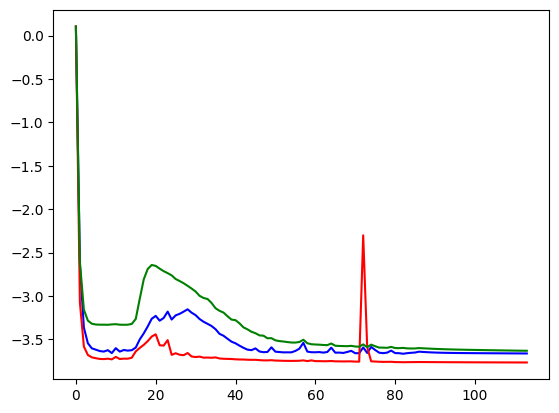

In [74]:
k=1


inputs.shape
out_ts = []
for i in range(outp.shape[1]):
    out_ts.append(np.mean(outp[k,i,:,:].cpu().detach().numpy()))

label_ts = []
for i in range(lab.shape[1]):
    label_ts.append(np.mean(lab[k,i,:,:].cpu().detach().numpy()))

inp_ts = []
for i in range(inp.shape[1]):
    inp_ts.append(np.mean(inp[k,i,:,:].cpu().detach().numpy()))
    
#plt.yscale('log')
plt.plot(out_ts, c='b') 
plt.plot(label_ts, c='r')
plt.plot(inp_ts, c='g')

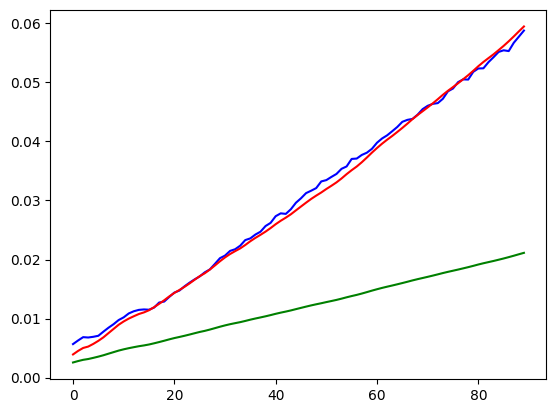

In [137]:
k=0
inputs.shape
out_ts = []
for i in range(outputs.shape[3]):
    out_ts.append(np.mean(outputs[k,:,:,i].cpu().detach().numpy()))

label_ts = []
for i in range(labels.shape[3]):
    label_ts.append(np.mean(labels[k,:,:,i,1].cpu().detach().numpy()))

inp_ts = []
for i in range(inputs.shape[1]):
    inp_ts.append(np.mean(inputs[k,i,:,:,1].cpu().detach().numpy()))
    
plt.plot(out_ts, c='b') 
plt.plot(label_ts, c='r')
plt.plot(inp_ts, c='g')

In [46]:
torch.min(labels)

tensor(4.8552e-22, device='cuda:0')

In [39]:
x.shape
new_x=x.repeat_interleave(5, dim=3)

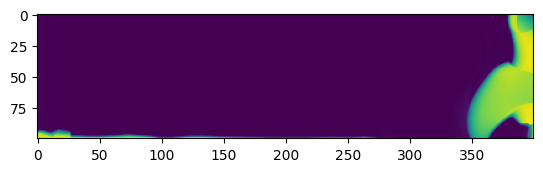

In [52]:
plt.imshow(x[8,89,:,:])

In [19]:
torch.min(labels)
#labels
#outputs

tensor(1.4142e-25, device='cuda:0')

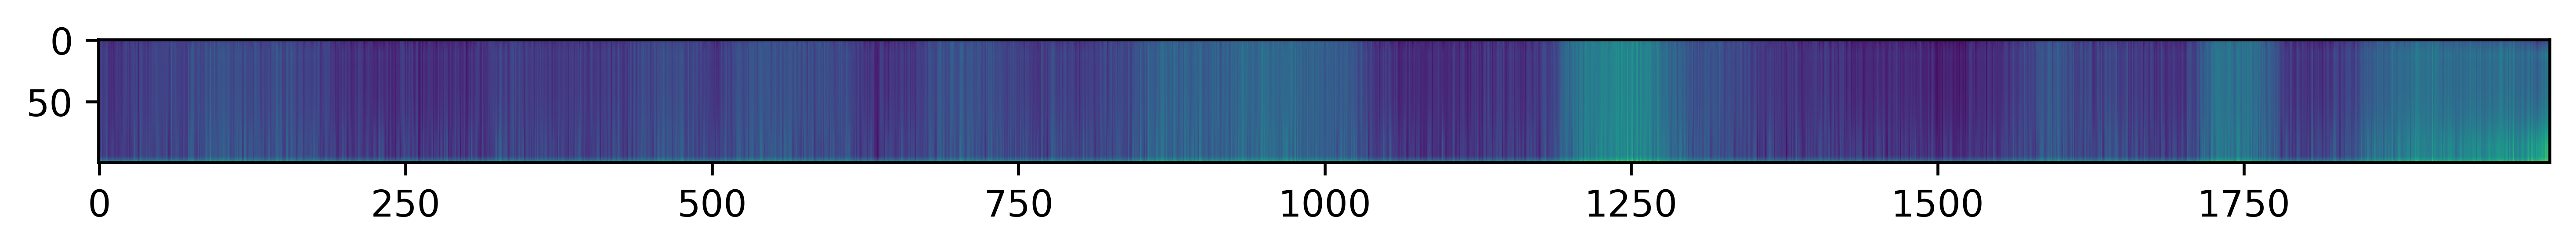

In [78]:
n=1
out = outp[1,80,:,:].cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(12,12), dpi=600)
plt.imshow(out)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()

#orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

#nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
#print (orig_error, nn_error)

In [ ]:
### test_dataset = VelDataset(h5_files_train[41:], h5_files[41:])
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False,  num_workers=0)

In [70]:
outputs.shape

torch.Size([4, 90, 100, 2000])

In [82]:
criterion = nn.MSELoss()  # Replace with your loss function if needed

# Lists to store predictions and true labels
all_predictions = []
all_labels = []
n=5

model1.eval()
# Iterate through the test data
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        inputs = inputs.float()
        labels = labels.float()
        #inputs = inputs.repeat_interleave(10, dim=3)
        #labels = labels[0,:,:,:,:].permute(0,2,1,3)
        # Forward pass
        outputs = model1(inputs)
        all_predictions.append(outputs.cpu().detach().numpy())
        all_labels.append(labels.cpu().detach().numpy())
        print(criterion2(labels, outputs))
        inputs = inputs.repeat_interleave(10, dim=3)
        print (criterion2(labels, inputs))
        # If you have a loss function, compute the loss (optional)
        #orig_error = np.abs(np.mean(inputs.cpu().detach().numpy()) - np.mean(labels.cpu().detach().numpy()))

        #nn_error = np.abs(np.mean(outputs.cpu().detach().numpy()) - np.mean(labels.cpu().detach().numpy()))
        #print (orig_error, nn_error)

tensor(0.0099, device='cuda:0')
tensor(0.0147, device='cuda:0')


In [60]:
inputs.shape

torch.Size([2, 90, 100, 400, 2])

In [16]:
print((0.0043909806+0.023773938+0.03114998+0.0043200747+0.0049229813+0.0026212687)/6)
print((0.0034722257+0.05977188+0.063873395+0.012106983+0.0037977695+0.0053939596)/6)

0.011863203883333333
0.024736035466666664


In [61]:
all_predictions[0].shape

(1, 90, 100, 2000)

In [62]:
criterion2(labels, outputs)

tensor(2559.6172, device='cuda:0')

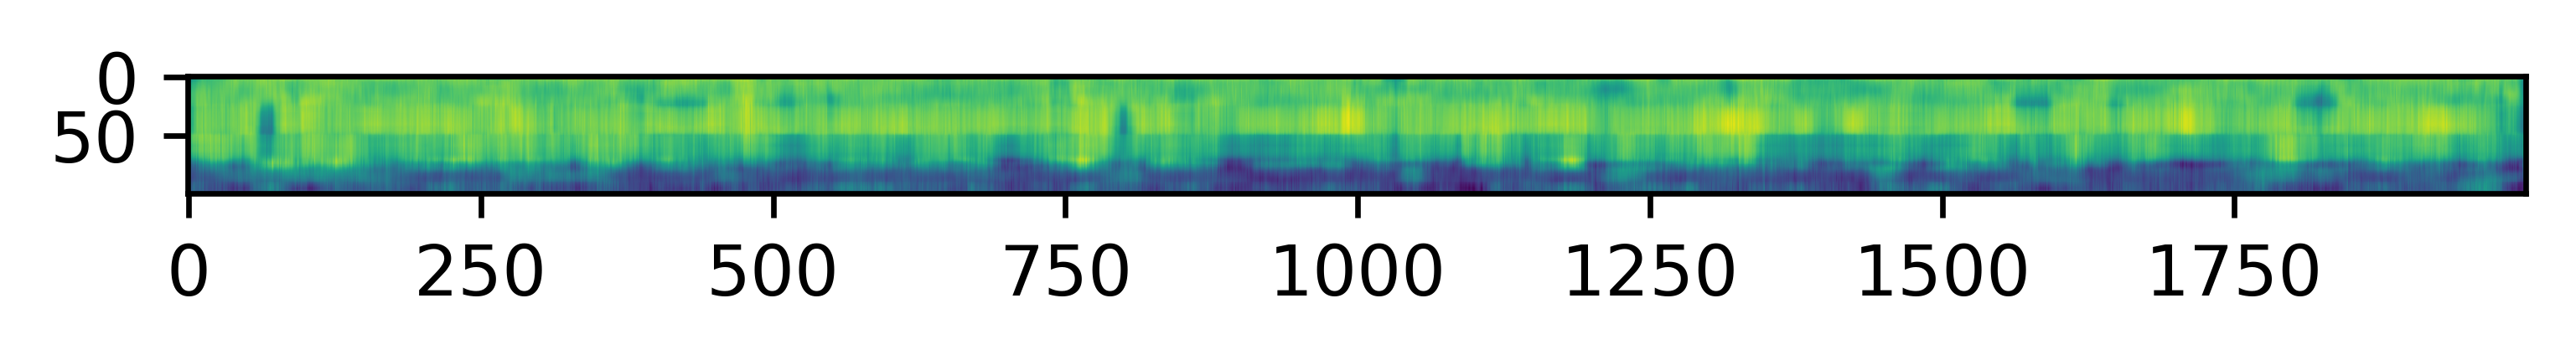

In [59]:
n=4
out = all_predictions[1][0,89,:,:]
#out = all_labels[0][0,89,:,:]

#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(6,6), dpi=600)
plt.imshow(out)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()



In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = UNet3(400, 2000).to(device)
model2 = UNet3(400, 2000).to(device)
model3 = UNet3(400, 2000).to(device)
model4 = UNet3(400, 2000).to(device)
model5 = UNet5(400, 2000).to(device)
model6 = UNet5(400, 2000).to(device)


#model2 = UNet2(400, 800).to(device)

#model3 = UNet2(800, 1200).to(device)

#model4 = UNet2(1200, 1600).to(device)

#model5 = UNet2(1600, 2000).to(device)
model1

UNet3(
  (up1): Conv2d(400, 800, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=6, out_features=12, bias=True)
  (d1): Dropout(p=0.1, inplace=False)
  (up2): Conv2d(800, 1200, kernel_size=(1, 1), stride=(1, 1))
  (fc2): Linear(in_features=12, out_features=1, bias=True)
  (up4): Conv2d(1200, 2000, kernel_size=(1, 1), stride=(1, 1))
)

In [15]:
model_weights_path = 'weights_vel2'
model1.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_press2'
model2.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_por2'
model3.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_crv2'
model4.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_molass2'
model5.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_bio2'
model6.load_state_dict(torch.load(model_weights_path))
model6

UNet5(
  (up1): Conv2d(400, 800, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=6, out_features=24, bias=True)
  (d1): Dropout(p=0.1, inplace=False)
  (up2): Conv2d(800, 1200, kernel_size=(1, 1), stride=(1, 1))
  (fc2): Linear(in_features=24, out_features=6, bias=True)
  (up4): Conv2d(1200, 2000, kernel_size=(1, 1), stride=(1, 1))
  (fc3): Linear(in_features=6, out_features=1, bias=True)
)

In [24]:
model7 = UNet4(400, 2000).to(device)
model7

UNet4(
  (fc1): Linear(in_features=6, out_features=6, bias=True)
)

In [25]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ExponentialLR


#class CustomDataset(Dataset):
#    def __init__(self, x, target):
#        """
#        Args:
#            data (numpy array): A numpy array of shape [N, 100, 200, 19] where N is the number of samples.
#        """
#        self.x = torch.tensor(x, dtype=torch.float32)
#        self.target = torch.tensor(target, dtype=torch.float32)#
#
#    def __len__(self):
#        return len(self.x)
#
#    def __getitem__(self, idx):
#        input = self.x[idx]
#        target = self.target[idx]
#        return input, target

#criterion3 = SmoothnessLoss(.1, .1)
#dataset = CustomDataset(x, y)
#dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#criterion1 = DivLoss()
criterion2 = nn.MSELoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.0002)
optimizer3 = optim.Adam(model3.parameters(), lr=0.0002)
optimizer4 = optim.Adam(model4.parameters(), lr=0.0002)
optimizer5 = optim.Adam(model5.parameters(), lr=0.0002)
optimizer6 = optim.Adam(model5.parameters(), lr=0.0002)
optimizer7 = optim.Adam(model5.parameters(), lr=0.0002)


gamma = .9999  # The exponential decay factor (adjust as needed)
scheduler1 = ExponentialLR(optimizer1, gamma=gamma)
scheduler2 = ExponentialLR(optimizer2, gamma=gamma)
scheduler3 = ExponentialLR(optimizer3, gamma=gamma)
scheduler4 = ExponentialLR(optimizer4, gamma=gamma)
scheduler5 = ExponentialLR(optimizer5, gamma=gamma)
scheduler6 = ExponentialLR(optimizer6, gamma=gamma)
scheduler7 = ExponentialLR(optimizer7, gamma=gamma)

optimizers = [optimizer1,optimizer2,optimizer3,optimizer4,optimizer5,optimizer6,optimizer7]
schedulers = [scheduler1,scheduler2,scheduler3,scheduler4,scheduler5,scheduler6,scheduler7]
#import gc
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()
model = [model1,model2,model3,model4,model5,model6]
model7.train()
# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    
    count=0
    running_loss=0
    for batch in dataloader:
        inputs = batch[0].to(device)
        inputs = inputs.float()
        labels = batch[1].to(device)
        labels = labels.float()
        #labels = labels[0,:,:,:,4].permute(2,1,0)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        outputs = torch.zeros((80,2000,100,6)).to(device)
        for k in range(labels.shape[3]):
            #with torch.no_grad():
            outputs[:,:,:,k] = model[k](inputs)

        #labels1 = labels[:,0:400,:,:]
        #labels2 = labels[:,0:800,:,:]
        #labels3 = labels[:,0:1200,:,:]
        #labels4 = labels[:,0:1600,:,:]
        optimizer1.zero_grad()
        #optimizer2.zero_grad()
        #optimizer3.zero_grad()
        #optimizer4.zero_grad()
        #optimizer5.zero_grad()
        #outputs1 = model1(inputs)
        #outputs2 = model2(outputs1)
        #outputs3 = model3(outputs2)
        #outputs4 = model4(outputs3)
        outputs = model7(outputs)
        #outputs2 = outputs2[:,400:800,:,:]
        #outputs3 = outputs3[:,800:1200,:,:]
        #outputs4 = outputs4[:,1200:1600,:,:]
        
        #loss1 = criterion2(outputs1, labels1)
        #loss2 = criterion2(outputs2, labels2)
        #loss3 = criterion2(outputs3, labels3)
        #loss4 = criterion2(outputs4, labels4)
        loss = criterion2(outputs, labels)

        #loss = (loss1*4+loss2+loss3+loss4+loss5)/8

        loss.backward()
        optimizer1.step()
        #optimizer2.step()
        #optimizer3.step()
        #optimizer4.step()
        #optimizer5.step()
        scheduler1.step()
        ##scheduler2.step()
        #scheduler3.step()
        #scheduler4.step()
        #scheduler5.step()
        count=count+1
        running_loss = running_loss+loss.item()
    #model7.eval()
# Iterate through the test data
    #nn_errors=[]
    #orig_errors=[]
    #with torch.no_grad():
    #    for inputs, labels in test_dataloader:
    #        inputs = inputs.to(device)
    #        labels = labels.to(device)
    #        inputs = inputs.float()
    #        labels = labels.float()
    #        labels = labels[0,:,:,:,:].permute(0,2,1,3)
    #        # Forward pass
    #        outputs = model1(inputs)
    #        #all_predictions.append(outputs.cpu().detach().numpy())
    #        #all_labels.append(labels.cpu().detach().numpy())
    #        # If you have a loss function, compute the loss (optional)
    #        n=0
    #        orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
    
    #        nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
    #        nn_errors.append(nn_error)
    #        orig_errors.append(orig_error)
    #print (np.mean(orig_errors), np.mean(nn_errors))
    current_lr = optimizer1.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count}, Learning Rate: {current_lr:.8f}")

Epoch 1/200, Loss: 159.88739277124404, Learning Rate: 0.00099601
Epoch 2/200, Loss: 153.98396366238595, Learning Rate: 0.00099203
Epoch 3/200, Loss: 153.21422865986824, Learning Rate: 0.00098807
Epoch 4/200, Loss: 152.37736921310426, Learning Rate: 0.00098413
Epoch 5/200, Loss: 151.97827052175998, Learning Rate: 0.00098020
Epoch 6/200, Loss: 151.8371748328209, Learning Rate: 0.00097628
Epoch 7/200, Loss: 151.63196961581707, Learning Rate: 0.00097239
Epoch 8/200, Loss: 151.5796983897686, Learning Rate: 0.00096851
Epoch 9/200, Loss: 151.64396729171276, Learning Rate: 0.00096464
Epoch 10/200, Loss: 151.4676573753357, Learning Rate: 0.00096079
Epoch 11/200, Loss: 151.48888604044913, Learning Rate: 0.00095695
Epoch 12/200, Loss: 151.32529764473438, Learning Rate: 0.00095313
Epoch 13/200, Loss: 151.35672963261604, Learning Rate: 0.00094933
Epoch 14/200, Loss: 151.29406080842017, Learning Rate: 0.00094554
Epoch 15/200, Loss: 151.2871945589781, Learning Rate: 0.00094176
Epoch 16/200, Loss: 151

KeyboardInterrupt: 

In [35]:
criterion = nn.MSELoss()  # Replace with your loss function if needed

# Lists to store predictions and true labels
all_predictions = []
all_labels = []

model7.eval()
# Iterate through the test data
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        inputs = inputs.float()
        labels = labels.float()
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        outputs = torch.zeros((80,2000,100,6)).to(device)
        for k in range(labels.shape[3]):
            #with torch.no_grad():
            outputs[:,:,:,k] = model[k](inputs)
        # Forward pass
        #outputs = model7(outputs)
        all_predictions.append(outputs.cpu().detach().numpy())
        all_labels.append(labels.cpu().detach().numpy())
        loss = criterion(outputs,labels)
        print ("Loss: ", loss.item())
        # If you have a loss function, compute the loss (optional)
        orig_error = np.abs(np.mean(inputs[0,:,:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,:].cpu().detach().numpy()))

        nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,:].cpu().detach().numpy()))
        print (orig_error, nn_error)

Loss:  2.6761043071746826
0.09839177 0.5566623
Loss:  2.659982442855835
0.12734497 0.61660105
Loss:  2.929009437561035
0.1413343 0.091187716
Loss:  3.2276692390441895
0.026858568 0.7345431
Loss:  2.6161303520202637
0.050297737 0.16991472
Loss:  1.6953140497207642
0.022475481 0.3268901


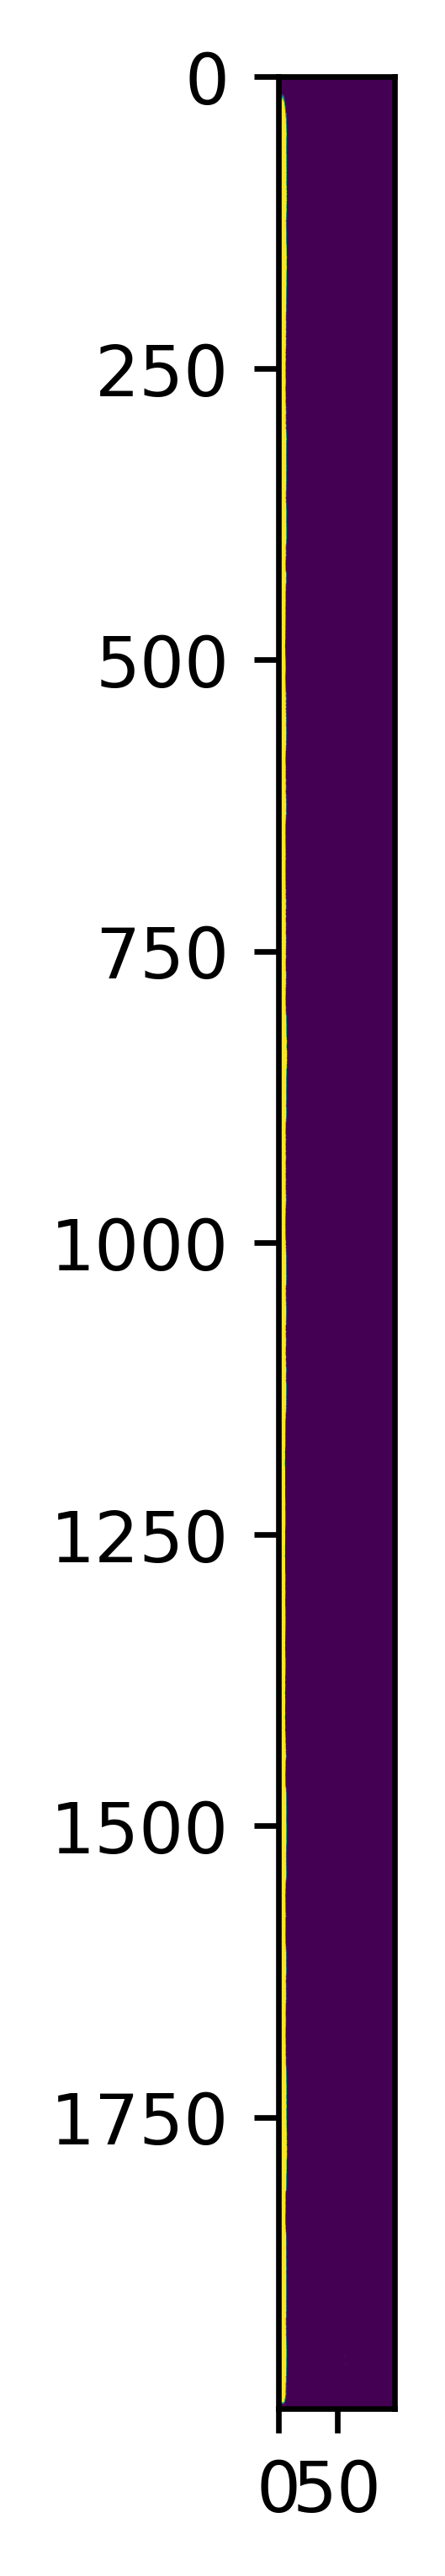

In [62]:
n=0
out = all_predictions[4][70,:,:,n]#.cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(6,6), dpi=600)
plt.imshow(out, vmin = -.5, vmax=.5)

In [ ]:
import torch
import torch.nn as nn

def aggregate_horizontal_means(tensor):
    """
    Aggregate horizontal means for every 10 rows along the 100-length dimension.
    Args:
        tensor (torch.Tensor): Tensor of shape [batch_size, 100, 2000, 19].
    Returns:
        torch.Tensor: Tensor of shape [batch_size, 10, 19].
    """
    batch_size, _, width, channels = tensor.shape
    aggregated_means = []

    for start_row in range(0, 100, 10):
        # Extract 10-row block and compute mean
        block = tensor[:, start_row:start_row + 10, :, :]
        block_mean = torch.mean(block, dim=2)  # Mean along the width (2000)
        block_mean = torch.mean(block_mean, dim=1)  # Mean along the 10 rows
        aggregated_means.append(block_mean)

    # Combine the means into a single tensor
    aggregated_means_tensor = torch.stack(aggregated_means, dim=1)
    return aggregated_means_tensor

class CustomMSELoss(nn.Module):
    def __init__(self):
        super(CustomMSELoss, self).__init__()
        self.mse_loss = nn.MSELoss()

    def forward(self, y_pred, y_true):
        # Aggregate horizontal means
        y_pred_agg = aggregate_horizontal_means(y_pred)
        y_true_agg = aggregate_horizontal_means(y_true)

        # Calculate MSE between the aggregated tensors
        return self.mse_loss(y_pred_agg, y_true_agg)



# Example usage
# Assuming y_pred and y_true are your model's output and ground truth tensors respectively
# with shape [batch_size, 100, 2000, 19]
custom_loss = CustomMSELoss()
#loss = custom_loss(y_pred, y_true)

import torch
import torch.nn as nn
import torch.nn.functional as F


class SmoothnessLoss(nn.Module):
    def __init__(self, dx, dy):
        """

        """
        super(SmoothnessLoss, self).__init__()
        self.dx = dx
        self.dy = dy

    def forward(self, v):
        v1 = v[:,:,:,0].permute(0,2,1)
        v2 = v[:,:,:,1].permute(0,2,1)

        # Calculate horizontal and vertical differences
        horizontal_diff = torch.abs(torch.diff(v1, dim=2) / self.dx)
        vertical_diff = torch.abs(torch.diff(v2, dim=1) / self.dy)

        # Calculate the squared differences (L2 norm)
        horizontal_loss = torch.sum(horizontal_diff)
        vertical_loss = torch.sum(vertical_diff)

        # Total loss
        loss = horizontal_loss + vertical_loss
        #if loss > .001:

        return loss

# Example usage with dummy data
# Create sample velocity fields as PyTorch tensors



def calculate_divergence(vx, vy, dx, dy):
    # Use PyTorch's built-in functions for gradient computation
    dvx_dx = torch.diff(vx, dim=1) / dx
    dvy_dy = torch.diff(vy, dim=2) / dy


    # Pad the last dimension to match the original size
    #dvx_dx = F.pad(dvx_dx, (0, 1), "constant", 0)
    #dvy_dy = F.pad(dvy_dy, (0, 0, 0, 1), "constant", 0)

    return dvx_dx[:,:,0:1999] + dvy_dy[:,0:99,:]

class DivLoss(nn.Module):
    def __init__(self):
        super(DivLoss, self).__init__()
        self.mse_loss = nn.MSELoss()

    def forward(self, y_pred, y_true):
        dx = .1
        dy = dx
        
        ypred_vx = y_pred[:,:,:,0].permute(0,2,1)
        ypred_vy = y_pred[:,:,:,1].permute(0,2,1)
    
        ytrue_vx = y_true[:,:,:,0].permute(0,2,1)
        ytrue_vy = y_true[:,:,:,1].permute(0,2,1)
        
        y_pred_div = calculate_divergence(ypred_vx, ypred_vy, dx, dy)
        y_true_div = calculate_divergence(ytrue_vx, ytrue_vy, dx, dy)

        return torch.mean(torch.abs(torch.abs(y_pred_div)-torch.abs(y_true_div)))

class NormLoss(nn.Module):
    def __init__(self):
        super(NormLoss, self).__init__()
        self.mse_loss = nn.MSELoss()

    def forward(self, y_pred, y_true):
        true_means=[]
        pred_means=[]
        for i in y_pred.shape[3]:
            ypred_flat = torch.flatten(y_pred[:,:,:,i])
            ypred_mean = torch.mean(ypred_flat)
            ypred_std = torch.std(ypred_flat)
            pred_means.append([ypred_mean, ypred_std])

            ytrue_flat = torch.flatten(y_true[:,:,:,i])
            ytrue_mean = torch.mean(ytrue_flat)
            ytrue_std = torch.std(ytrue_flat)
            true_means.append([ytrue_mean, ytrue_std])

        return self.mse_loss(pred_means, true_means)
# Example usage (assuming y_pred and y_true are PyTorch tensors with appropriate dimensions)
# loss_fn = DivLoss()
# loss = loss_fn(y_pred, y_true)



#divergence = calculate_divergence(vx, vy, dx, dy)


In [ ]:
vx = torch.rand(114, 100, 2000)  # Assuming the shape [batch_size, height, width]
vy = torch.rand(114, 100, 2000)

# Assume uniform grid spacing
dx = 0.1  # x-spacing
dy = 0.1  # y-spacing

# Create an instance of the SmoothnessLoss class
smoothness_loss_fn = SmoothnessLoss(dx, dy)

# Calculate smoothness loss for vx and vy
smoothness_loss_vx = smoothness_loss_fn(vx)
smoothness_loss_vy = smoothness_loss_fn(vy)

(smoothness_loss_vx.item(), smoothness_loss_vy.item())

In [ ]:
dx = .1
dy = dx

ypred_vx = outputs[:,:,:,0].permute(0,2,1)
ypred_vy = outputs[:,:,:,1].permute(0,2,1)

ytrue_vx = labels[:,:,:,0].permute(0,2,1)
ytrue_vy = labels[:,:,:,1].permute(0,2,1)

y_pred_div = calculate_divergence(ypred_vx, ypred_vy, dx, dy)
y_true_div = calculate_divergence(ytrue_vx, ytrue_vy, dx, dy)
plt.figure(figsize=(12,12))
plt.imshow(np.abs(y_pred_div.cpu().detach().numpy()[50,:,:]), norm=LogNorm())
plt.colorbar()

In [ ]:
# Assuming you have a CustomDataset class
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ExponentialLR


class CustomDataset(Dataset):
    def __init__(self, x, target):
        """
        Args:
            data (numpy array): A numpy array of shape [N, 100, 200, 19] where N is the number of samples.
        """
        self.x = torch.tensor(x, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        input = self.x[idx]
        target = self.target[idx]
        return input, target

from sklearn.preprocessing import StandardScaler

#scalerx = StandardScaler()
#scalery = StandardScaler()

#x_scaled = scalerx.fit_transform(x.reshape(1, -1))
#y_scaled = scalery.fit_transform(y.reshape(1 -1))

criterion3 = SmoothnessLoss(.1, .1)
dataset = CustomDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(n_channels=100, n_classes=9).to(device)
criterion1 = DivLoss()
criterion2 = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)
gamma = 0.99998  # The exponential decay factor (adjust as needed)
scheduler = ExponentialLR(optimizer, gamma=gamma)
#import gc

# Training loop
num_epochs = 40000
for epoch in range(num_epochs):
    model.train()
    for batch in dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        optimizer.zero_grad()
        outputs = model(inputs)
         # Assuming you want to compare against the input
        loss2 = criterion2(outputs, labels)
        if epoch < 3000:
            loss1 = criterion1(outputs, labels) 
            loss3 = criterion3(outputs)
            loss = (.2*loss1+loss2*2 + .000000002*loss3)/3
        else:
            loss1 = criterion1(outputs, labels) 
            loss = loss2+.001*loss1
        loss.backward()
        optimizer.step()
        scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Learning Rate: {current_lr:.6f}")



In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.0015)
gamma = 0.99994  # The exponential decay factor (adjust as needed)
scheduler = ExponentialLR(optimizer, gamma=gamma)
#import gc

# Training loop
num_epochs = 30000
for epoch in range(num_epochs):
    model.train()
    for batch in dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss1 = criterion1(outputs, labels)  # Assuming you want to compare against the input
        loss2 = criterion2(outputs, labels)
        loss3 = criterion3(outputs)
        loss = (loss1*.1+loss2*2 + .000000001*loss3)/3
        loss.backward()
        optimizer.step()
        scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Learning Rate: {current_lr:.6f}")

In [ ]:
criterion = DivLoss()#nn.MSELoss()

criterion(outputs, labels)

In [ ]:
labels[10,:,:,1]

In [ ]:
num_epochs = 30000

dataset = CustomDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
from torch.optim.lr_scheduler import ExponentialLR

# Model, loss, and optimizer

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0012)
gamma = 0.99995  # The exponential decay factor (adjust as needed)
scheduler = ExponentialLR(optimizer, gamma=gamma)

for epoch in range(num_epochs):
    model.train()
    for batch in dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Assuming you want to compare against the input
        loss.backward()
        optimizer.step()
        scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']

    # Print the current learning rate    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Learning Rate: {current_lr:.6f}")


In [ ]:
with h5py.File(h5_files[0], 'r') as file:
    for name in file:
        #if isinstance(file[name], h5py.Group):
        print(file[name])

In [ ]:
torch.save(model1.state_dict(), 'weights_att')

3.9034523e-05 0.006597762


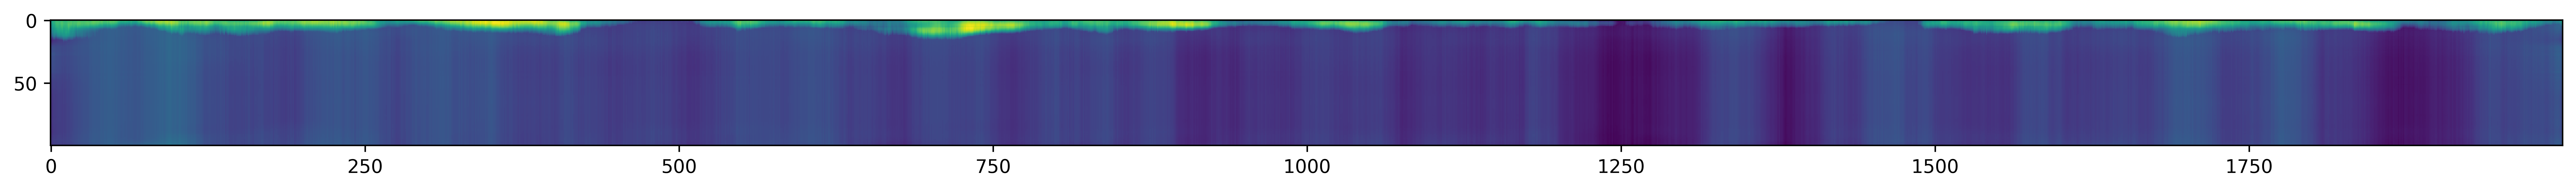

In [18]:
n=6
out = outputs[100,:,:,n].permute(1,0).cpu().detach().numpy()
out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(24,24), dpi=600)
plt.imshow(out)#, norm=LogNorm(.0001,.5))
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()

orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

nn_error = np.abs(np.mean(outputs[:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
print (orig_error, nn_error)

In [ ]:
np.max(out)

In [ ]:
# Number of time steps and features to extract
#file_path = '/mnt/data/high_losing_42_11_1xscale.h5'
import h5py
import cv2
import numpy as np
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

base_dir = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/'
f_dir = os.listdir(base_dir)
h5_files = []
h5_files_train = []

# Iterate over all files in the directory
for filename in f_dir:
    if (filename.endswith(".h5")) & ((("2x" in filename))):
        h5_files_train.append(base_dir+filename)
#     if (filename.endswith(".h5")) & (("8x" in filename)):
#         if (("10_5" not in filename) & ("20_20" not in filename)):
#             h5_files_train.append(base_dir+filename)
    if (filename.endswith(".h5")) & ((("10x" in filename))):
#         if (("10_5" in filename) | ("20_20" in filename)):
        h5_files.append(base_dir+filename)
# Run the processing in parallel
h5_files_train =  sorted(
    h5_files_train,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)
h5_files =  sorted(
    h5_files,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)

h5_files_test = h5_files[20:21]
h5_files_train_test = h5_files_train[20:21]
hdf5_file = h5py.File(h5_files_test[0], 'r')
# Fetching the first five time steps
time_steps = sorted(list(hdf5_file.keys()))

# Inspecting the features present in each of these time steps
features_per_time_step = {time_step: list(hdf5_file[time_step].keys()) for time_step in time_steps}


num_time_steps = 115
num_features = 9  # As observed from the dataset

# Initialize the final array with the desired shape [5, 100, 200, 19]
y_test = np.zeros((len(h5_files_test),num_time_steps-1, 100, 2000, num_features))

# Extracting and reshaping data from the first five time steps
for i in range(len(h5_files_test)):
    hdf5_file = h5py.File(h5_files_test[i], 'r')
    for t_idx, time_step in enumerate(time_steps[2:]):  # Skipping the first two non-time-step groups
        count=0
        for f_idx, feature in enumerate(features_per_time_step[time_step]):
            if ('O2' not in feature)& ('Perm' not in feature)& ('Material' not in feature)& ('Sat' not in feature)& ('Z' not in feature)& ('biocide' not in feature)& ('ethanol' not in feature)& ('Chubbite' not in feature):
                dataset = hdf5_file[time_step][feature]
                y_test[i, t_idx, :, :, count] = dataset[:, :, 0]#cv2.resize(dataset[:, :, 0], [500,50])  # Reshape and assign
                count = count+1

# Checking the shape of the extracted data array


x_test = np.zeros((len(h5_files_train_test),num_time_steps-1, 100, 400, num_features))

# Extracting and reshaping data from the first five time steps
for i in range(len(h5_files_train_test)):
    hdf5_file = h5py.File(h5_files_train_test[i], 'r')
    for t_idx, time_step in enumerate(time_steps[2:]):  # Skipping the first two non-time-step groups
        count=0
        for f_idx, feature in enumerate(features_per_time_step[time_step]):
            if ('O2' not in feature)& ('Perm' not in feature)& ('Material' not in feature)& ('Sat' not in feature)& ('Z' not in feature)& ('biocide' not in feature)& ('ethanol' not in feature)& ('Chubbite' not in feature):
                dataset = hdf5_file[time_step][feature]
                x_test[i, t_idx, :, :, count] = dataset[:, :, 0]#cv2.resize(dataset[:, :, 0], [500,50])  # Reshape and assign
                count = count+1

In [ ]:
#torch.save(model, 'model')
#torch.save(model.state_dict(), 'model_weights2')
x_test.shape


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(n_channels=100, n_classes=9).to(device)


In [ ]:
model_weights_path = 'weights_att'

# Load the model's state dictionary (weights)
model1.load_state_dict(torch.load(model_weights_path))
model1

In [ ]:
scales=[[-3.8411125549317013, 597.4671440974266],
 [-615.1042997637863, 357.84820748247256],
 [0.0, 6822.169871757096],
 [0.0001, 0.6],
 [7.788525219135888, 15.024872883573318],
 [9.998195511764697e-21, 0.0021615209557147423],
 [9.992418077905442e-21, 0.00019222389277486797],
 [1e-10, 353.88041919640534],
 [9.999999999999992e-21, 4.945182939521276]]

for i in range(x_test.shape[4]):
    xmin = scales[i][0]
    xmax = scales[i][1]
    x_test[:,:,:,:,i] = (x_test[:,:,:,:,i] - xmin)/(xmax-xmin)
    y_test[:,:,:,:,i] = (y_test[:,:,:,:,i] - xmin)/(xmax-xmin)
scales

In [ ]:
for i in range(x_test.shape[4]):
    xmin = scales[i][0]
    xmax = scales[i][1]
    x_test[:,:,:,:,i] = (x_test[:,:,:,:,i] - xmin)/(xmax-xmin)
    y_test[:,:,:,:,i] = (y_test[:,:,:,:,i] - xmin)/(xmax-xmin)
    #scales.append([xmin,xmax])
y_test[0,100,0,:,7]

In [ ]:
test_dataset = CustomDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  # Adjust batch size as needed

# Define a loss function if needed (e.g., for validation)
criterion = nn.MSELoss()  # Replace with your loss function if needed

# Lists to store predictions and true labels
all_predictions = []
all_true_labels = []

model1.eval()
# Iterate through the test data
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        # Forward pass
        outputs = model1(inputs)
        all_predictions.append(output.cpu().detach().numpy())
        all_labels.append(labels.cpu().detach().numpy())
        # If you have a loss function, compute the loss (optional)
        loss = criterion(outputs, labels)
        print (loss)


# Calculate accuracy (or other evaluation metrics)


In [ ]:
n=7
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(24,24), dpi=600)
val = outputs[100,:,:,n].permute(1,0).cpu().detach().numpy()
plt.imshow(val)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label_test.png')  # Replace 'output.png' with your desired file path and format

field_names[n]

In [ ]:
n=7

orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

nn_error = np.abs(np.mean(outputs[:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
print (orig_error, nn_error)

In [ ]:
print (orig_error, nn_error)

In [ ]:
scales=[[-3.8411125549317013, 597.4671440974266],
 [-615.1042997637863, 357.84820748247256],
 [0.0, 6822.169871757096],
 [0.0001, 0.6],
 [7.788525219135888, 15.024872883573318],
 [9.998195511764697e-21, 0.0021615209557147423],
 [9.992418077905442e-21, 0.00019222389277486797],
 [1e-10, 353.88041919640534],
 [9.999999999999992e-21, 4.945182939521276]]
scales

In [ ]:
import numpy as np

def calculate_divergence(vx, vy, dx, dy):
    """
    Calculate the divergence of a 2D velocity field using a forward-looking finite difference scheme.
    
    Parameters:
    vx: 2D array of velocity in the x-direction
    vy: 2D array of velocity in the y-direction
    dx: Grid spacing in the x-direction
    dy: Grid spacing in the y-direction
    
    Returns:
    divergence: 2D array of divergence values
    """
    # Get the dimensions of the velocity field
    rows, cols = vx.shape

    # Initialize an array to store divergence
    divergence = np.zeros((rows, cols))

    # Calculate divergence using forward differences
    # For the edges, we use backward differences to avoid index out of range
    for i in range(rows):
        for j in range(cols):
            dvx_dx = (vx[i, min(j+1, cols-1)] - vx[i, j]) / dx
            dvy_dy = (vy[min(i+1, rows-1), j] - vy[i, j]) / dy
            divergence[i, j] = dvx_dx + dvy_dy

    return divergence

# Example usage with dummy data
# Create sample velocity fields
#vx = outputs[100,:,:,0].permute(1,0).cpu().detach().numpy()

#vy = outputs[100,:,:,1].permute(1,0).cpu().detach().numpy()


# Assume uniform grid spacing
#dx = 1  # x-spacing
#dy = 1  # y-spacing

# Calculate divergence
#divergence = calculate_divergence(vx, vy, dx, dy)
#divergence


In [ ]:
mse=nn.MSELoss()

In [ ]:
mse(1,1)

In [ ]:
scales_train=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        scales_train.append(i.split('_')[7][0])
    else:
        scales_train.append(i.split('_')[6][0])
    
scales=[]
for i in h5_files:
    if 'high_gaining' in i:
        scales.append(i.split('_')[7][0])
    else:
        scales.append(i.split('_')[6][0])
scales

In [ ]:
import h5py
import cv2

base_dir = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/'
f_dir = os.listdir(base_dir)
h5_files = []
h5_files_train = []

# Iterate over all files in the directory
for filename in f_dir:
    if (filename.endswith(".h5")) & ((("2x" in filename))):
        h5_files_train.append(base_dir+filename)
#     if (filename.endswith(".h5")) & (("8x" in filename)):
#         if (("10_5" not in filename) & ("20_20" not in filename)):
#             h5_files_train.append(base_dir+filename)
    if (filename.endswith(".h5")) & ((("10x" in filename))):
#         if (("10_5" in filename) | ("20_20" in filename)):
        h5_files.append(base_dir+filename)
# Run the processing in parallel
h5_files_train =  sorted(
    h5_files_train,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)
h5_files =  sorted(
    h5_files,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)

perm_covar=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        perm_covar.append(int(i.split('_')[5])/int(i.split('_')[6]))
    else:
        perm_covar.append(int(i.split('_')[4])/int(i.split('_')[5]))
perm_covar    

In [ ]:
perm_covar=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        perm_covar.append(int(i.split('_')[5])/int(i.split('_')[6]))
    else:
        perm_covar.append(int(i.split('_')[4])/int(i.split('_')[5]))
perm_covar   

max_l=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        max_l.append(np.max([int(i.split('_')[5]),int(i.split('_')[6])]))
    else:
        max_l.append(np.max([int(i.split('_')[4]),int(i.split('_')[5])]))
max_l

growth_rates=[]
rate_c=[]
rate_d=[]
exp_b = []
for i in range(len(h5_files)):
    file_path = h5_files[i][:-3]+'.in'
    #print (file_path)
    with open(file_path, 'r') as file:
        lines = file.readlines()
    gr = float(lines[79].split()[1].replace('d', 'e'))
    c = float(lines[81].split()[1].replace('d', 'e'))
    d = float(lines[94].split()[1].replace('d', 'e'))
    b = float(lines[65].split()[1])
    growth_rates.append(gr)
    rate_c.append(c)
    rate_d.append(d)
    exp_b.append(b)


tags =[rate_c, rate_d, exp_b, max_l, perm_covar, growth_rates]
count=0
tag_scales = []
for i in tags:
    xmax = np.max(i)
    xmin = np.min(i)
    tags[count] = (i-xmin)/(xmax-xmin)
    tag_scales.append([xmin, xmax])
    count = count+1

tags_small = np.zeros([6,114,100,400,1)
for i in range(len(h5_files)):
    tags_small[i,:,0:16, :, :] = torch.full((1,114,16,400,1),tags[0][i])
    tags_small[i,:,16:32, :, :] = torch.full((1,114,16,400,1),tags[1][i])
    tags_small[i,:,32:48, :, :] = torch.full((1,114,16,400,1),tags[2][i])
    tags_small[i,:,48:64, :, :] = torch.full((1,114,16,400,1),tags[3][i])
    tags_small[i,:,64:80, :, :] = torch.full((1,114,16,400,1),tags[4][i])
    tags_small[i,:,80:, :, :] = torch.full((1,114,20,400,1),tags[5][i])

tags_big = torch.copy(tags_small)

In [ ]:


tags =[rate_c, rate_d, exp_b, max_l, perm_covar, growth_rates]
count=0
tag_scales = []
for i in tags:
    xmax = np.max(i)
    xmin = np.min(i)
    tags[count] = (i-xmin)/(xmax-xmin)
    tag_scales.append([xmin, xmax])
    count = count+1


In [ ]:
tags_small = np.zeros([6,114,100,400,1)
for i in range(len(h5_files)):
    tags_small[i,:,0:16, :, :] = torch.full((1,114,16,400,1),tags[0][i])
    tags_small[i,:,16:32, :, :] = torch.full((1,114,16,400,1),tags[1][i])
    tags_small[i,:,32:48, :, :] = torch.full((1,114,16,400,1),tags[2][i])
    tags_small[i,:,48:64, :, :] = torch.full((1,114,16,400,1),tags[3][i])
    tags_small[i,:,64:80, :, :] = torch.full((1,114,16,400,1),tags[4][i])
    tags_small[i,:,80:, :, :] = torch.full((1,114,20,400,1),tags[5][i])

tags_big = torch.copy(tags_small)
#torch.concat(x,tags_small)

In [ ]:
for i in range(len(dfs)):
    print (i,len(dfs_train[i]))

In [ ]:
h5_files

In [ ]:
import numpy as np
for i in range(len(dfs)):
    #rate b_1 (growth rate)
    #rate_c
    #exp_b
    #rate d_1 (carbon reuse)
    dfs[i]['sim_id']=i
    #dfs[i]['scale']=scales[i]
   # if 'gaining' in h5_files[i]:
   #     dfs[i]['type_id']=0
   # if 'high_gaining' in h5_files[i]:
   #     dfs[i]['type_id']=1
   # if 'losing' in h5_files[i]:
   #     dfs[i]['type_id']=2
   # if 'highlosing' in h5_files[i]:
   #     dfs[i]['type_id']=3
    dfs[i]['perm_covar']=perm_covar[i]
    dfs[i]['max_l']=max_l[i]
    perm_values = dfs[i]["Permeability_X [m^2]"].values
    if perm_covar[i]>1:
        k_eff =np.mean(perm_values.size / np.sum(1.0 / perm_values))
    else:
        k_eff = np.mean(perm_values)

    #dfs[i]['k_eff']=k_eff
    dfs[i]['growth_rates']=growth_rates[i]
    dfs[i]['rate_c']=rate_c[i]
    dfs[i]['rate_d']=rate_d[i]
    dfs[i]['exp_b']=exp_b[i]

for i in range(len(dfs_train)):
    dfs_train[i]['sim_id']=i
    #dfs_train[i]['scale']=scales_train[i]
    #if 'gaining' in h5_files[i]:
    #    dfs_train[i]['type_id']=0
    #if 'high_gaining' in h5_files[i]:
        #print (i[1].fname)
    #    dfs_train[i]['type_id']=1
    #if 'losing' in h5_files[i]:
    #    dfs_train[i]['type_id']=2
    #if 'highlosing' in h5_files[i]:
    #    dfs_train[i]['type_id']=3
#     if i >= 33:
#         dfs[i]['sim_id']=4
#     dfs[i]['sim_id2']=i
    
    dfs_train[i]['perm_covar']=perm_covar[i]
#     dfs[i]['gaining']=gaining[i]
#     dfs[i]['losing']=losing[i]
    dfs_train[i]['max_l']=max_l[i]
    #dfs[i]['NL']=NL[i]
    perm_values = dfs_train[i]["Permeability_X [m^2]"].values
    #if perm_covar[i]>1:
    #    k_eff =np.mean(perm_values.size / np.sum(1.0 / perm_values))
    #else:
    #    k_eff = np.mean(perm_values)

    #dfs_train[i]['k_eff']=k_eff
    #dfs_train[i]['k_eff']=k_eff
    dfs_train[i]['growth_rates']=growth_rates[i]
    dfs_train[i]['rate_c']=rate_c[i]
    dfs_train[i]['rate_d']=rate_d[i]
    dfs_train[i]['exp_b']=exp_b[i]
    

combined_df = pd.concat(dfs)
combined_df_train = pd.concat(dfs_train)
combined_df
final_data = np.array(combined_df)
final_data_train = np.array(combined_df_train)
x = np.delete(final_data_train, [1,2,5,7,8,15,16], 1)
target = np.delete(final_data, [1,2,5,7,8,15,16], 1)
 
#x_test = np.delete(final_data_train, [1,2,5,7,8,14,15,16,19], 1)
# #target = np.delete(final_data, [1,2,5,7,8,14,15,16,19], 1)
# #x = np.delete(final_data, [3, 5, 6, 11, 12, 13, 16,17,18,19], 1)
# y_train = final_data_train[:, 13]
# y_test = final_data[:, 13]
print (x.shape, target.shape)

In [ ]:
dfs_train[0].iloc[1,9:]


In [ ]:
dfs_train[0]